# Data Understanding

## Loading the datasets

In [3435]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

pd.options.display.max_colwidth = None

In [3436]:
incidents_df = pd.read_csv('incidents.csv')
poverty_df = pd.read_csv('povertyByStateYear.csv')
year_state_df = pd.read_csv('year_state_district_house.csv')

/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/4272445467.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_df = pd.read_csv('incidents.csv')


## Basic Checks

### Attribute Types

In [3437]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [3438]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [3439]:
year_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


In **incidents.csv** we noticed that the dected attribute type for columns 12-17 is object while it should be numerical. So these colums need further analysis.

For the other two datasets there are no relevant observations to be done about data types.

### Non-null Values Check

In [3440]:
incidents_df.isnull().any()

date                         False
state                        False
city_or_county               False
address                       True
latitude                      True
longitude                     True
congressional_district        True
state_house_district          True
state_senate_district         True
participant_age1              True
participant_age_group1        True
participant_gender1           True
min_age_participants          True
avg_age_participants          True
max_age_participants          True
n_participants_child          True
n_participants_teen           True
n_participants_adult          True
n_males                       True
n_females                     True
n_killed                     False
n_injured                    False
n_arrested                    True
n_unharmed                    True
n_participants               False
notes                         True
incident_characteristics1     True
incident_characteristics2     True
dtype: bool

In [3441]:
poverty_df.isnull().any()

state                False
year                 False
povertyPercentage     True
dtype: bool

In [3442]:
year_state_df.isnull().any()

year                      False
state                     False
congressional_district    False
party                     False
candidatevotes            False
totalvotes                False
dtype: bool

At first glance, 22 attributes in **incidents.csv** contain null values, **povertyByStateYear.csv** has one single column (povertyPercentage) containing null values while **year_state_district_house.csv** has non null values in its columns.

### Basic Statistics

In [3443]:
columns_to_include = ['latitude', 'longitude',
       'participant_age1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants']

incidents_df[columns_to_include].describe()

,latitude,longitude,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


Null values in **incidents.csv** impact on statistics. In this table we considered only the attributes that have sense to be considered for statistics.

We noticed that in _participant_age_1_ the max age registered is 311 which is clearly a wrong value. Since some numerical columns are not displayed, we deduce that there are non-numerical values in them (i.e. 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult').

Further exploration is required.

In [3444]:
incidents_df[incidents_df['participant_age1'] == 0][['participant_age1', 'notes', 'incident_characteristics1', 'incident_characteristics2']].value_counts()

participant_age1  notes                                                                                                                                                            incident_characteristics1                  incident_characteristics2                                   
0.0               1 inj                                                                                                                                                            Shot - Wounded/Injured                     Child Involved Incident                                         1
                  Forsyth Co, held child and wife at gunpoint, shot 11 mo old then self to end standoff                                                                            Shot - Dead (murder, accidental, suicide)  Suicide^                                                        1
                  Mother's BF arrested 4 shooting 11mo old & older child w/ BBs. Older child required hand surgery to remove BB. Mother arres

We noticed that in _participant_age_1_ the min age was 0 which could or could not be a wrong value. So, we investigated on that. We analyzed a sample of the rows that have this attribute to 0 and we discovered throught the notes that when the participant_age_1 is 0, there is an infant (whith age < 1) involved.

## Column Analysis (incidents.csv)

### Date

In [3445]:
try:
    incidents_df['date'] = pd.to_datetime(incidents_df['date'], errors='raise')
except ValueError as e:
    print(f"Error: {e}")


We used this method to check that the dates were all well-formatted. There were no NaT values and, at the same time, we converted the attribute from object to datetime value.

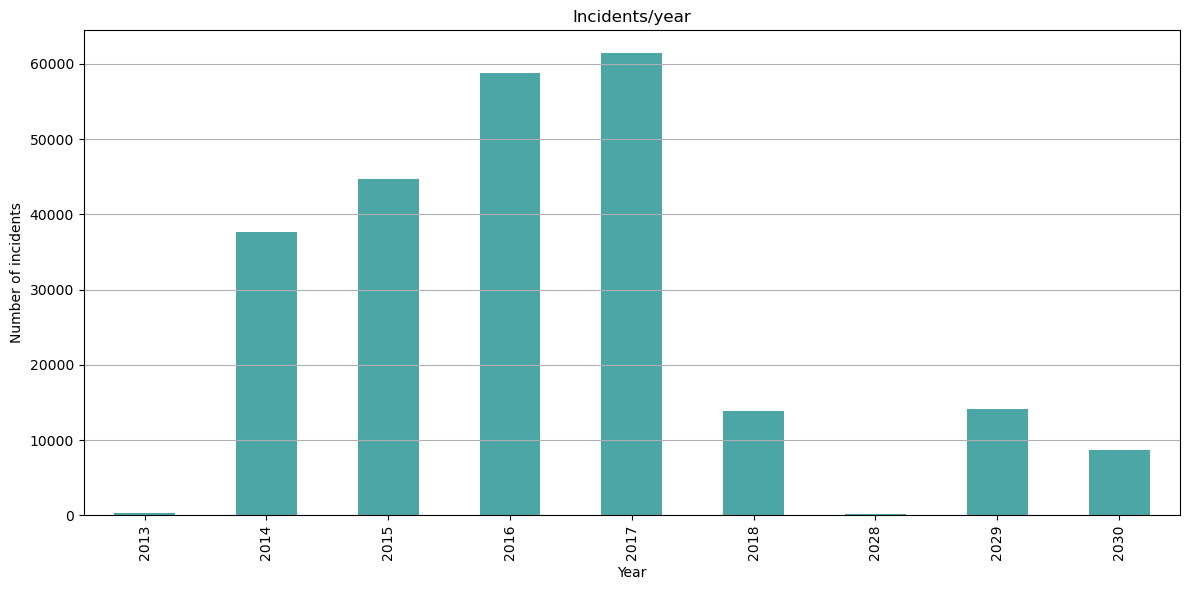

In [3446]:
incidents_per_year = incidents_df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/year')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3447]:
# Setting the date after 2023-10-01
percentage_invalid_dates = (incidents_df['date'] > "2023-10-01").sum() / incidents_df['date'].count() * 100

percentage_invalid_dates

9.609182357923371

We notice that are present incidents from 2028, 2029, 2030 that are clearly invalid because are after the date that the dataset was provided. 
The percentage of the invalid dates over the whole dataset is around 9.609 %.

Average incidents per month:  19973.083333333332


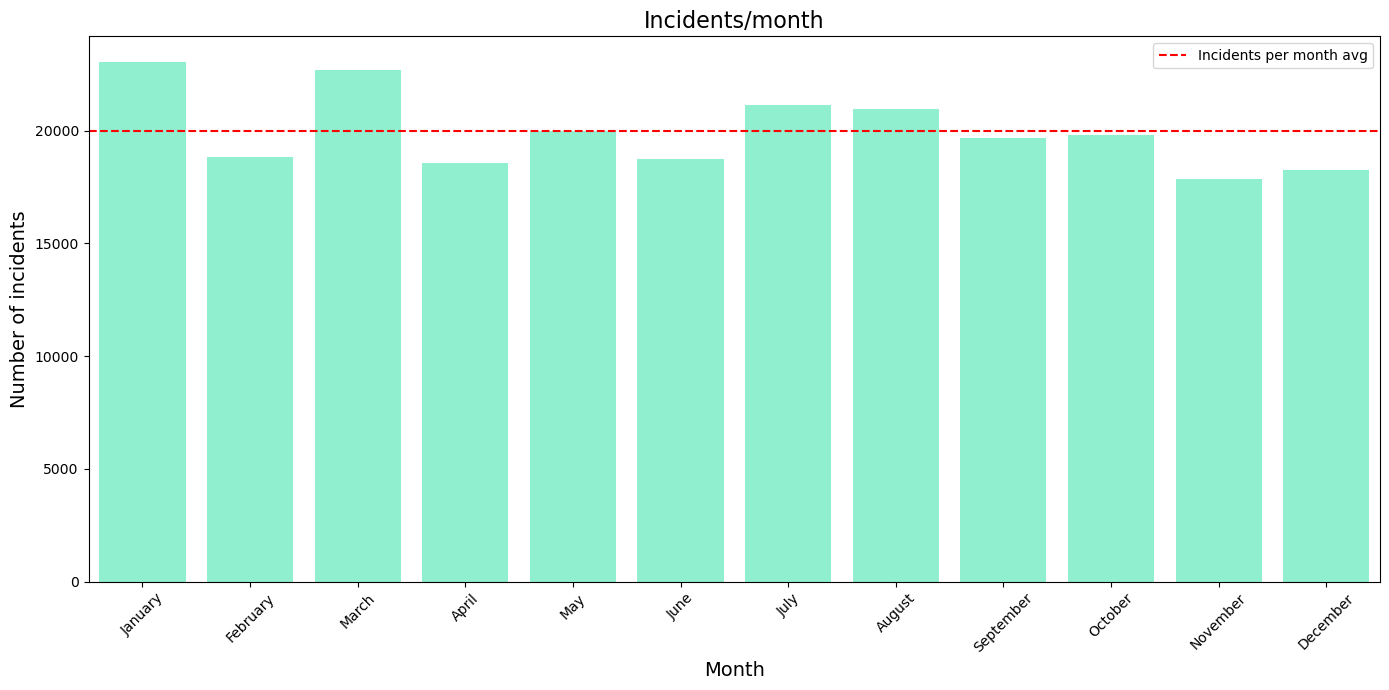

In [3448]:

from matplotlib.lines import lineStyles


month_counts = incidents_df['date'].dt.month.value_counts().sort_index()

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

incidents_average_per_month = month_counts.sum() / 12
print('Average incidents per month: ', incidents_average_per_month)

plt.figure(figsize=(14, 7))
sns.barplot(x=months, y=month_counts.values, color="aquamarine")
plt.title('Incidents/month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of incidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axhline(y=incidents_average_per_month, color='red', linestyle='--', label='Incidents per month avg')
plt.legend()
plt.show()

### State

This attribute is categorical. First of all, we check if there are null values in the column.

In [3449]:
incidents_df['state'].isnull().sum()

0

Since we are considering only the United States, we check if there are at most 50 different states in the column.

In [3450]:
incidents_df['state'].value_counts().shape

(51,)

In [3451]:
state_list = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas",
    "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

is_in_list = incidents_df['state'].isin(state_list)
is_not_in_list = ~is_in_list
incidents_df[is_not_in_list]


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
69,2030-08-13,District of Columbia,Washington,Frederick Douglas Place and Bruce Place SE,38.8516,-76.9773,1.0,NaN,NaN,NaN,...,3.0,0.0,0,1,0.0,3.0,4.0,NaN,Shot - Wounded/Injured,NaN
235,2014-02-14,District of Columbia,Washington,1200 block of Valley Avenue SE,38.8376,-76.9895,1.0,NaN,NaN,8.0,...,1.0,2.0,0,1,0.0,2.0,3.0,NaN,Shot - Wounded/Injured,NaN
259,2029-07-15,District of Columbia,Washington,Tennessee Avenue and First NE,38.9072,-77.0369,1.0,NaN,NaN,NaN,...,1.0,0.0,0,0,0.0,1.0,1.0,NaN,Armed robbery with injury/death and/or evidence of DGU found,NaN
464,2016-12-01,District of Columbia,Washington,1800 block of Capitol Avenue NE,38.9109,-76.9865,1.0,NaN,NaN,45.0,...,2.0,0.0,1,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239081,2029-05-15,District of Columbia,Washington,1800 block of Corcoran Street NE,38.9110,-76.9873,1.0,NaN,NaN,NaN,...,2.0,0.0,0,2,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
239094,2029-04-06,District of Columbia,Washington,600 Division Avenue,38.8974,-76.9264,1.0,NaN,NaN,NaN,...,1.0,0.0,1,0,0.0,0.0,1.0,Deanwood 1mvk,"Shot - Dead (murder, accidental, suicide)",NaN
239296,2017-07-07,District of Columbia,Washington,Central Ave and Southern Ave SE,38.8857,-76.9186,1.0,NaN,NaN,19.0,...,2.0,0.0,0,1,1.0,0.0,2.0,"pw with handgun, arrest 7/13",Non-Shooting Incident,Pistol-whipping
239313,2030-11-23,District of Columbia,Washington,"2100 block of Alabama Ave., SE",38.8507,-76.9752,1.0,NaN,NaN,NaN,...,2.0,1.0,0,3,0.0,0.0,3.0,NaN,Shot - Wounded/Injured,NaN


The exceeding state in the previous check is District of Columbia which is used to discriminate the city of Washington D.C. from the state of Washington. Since it's the federal district of the U.S.A. and doesn't belong to any of the 50 states, we treat it as a special state.

For a better understanding on the difference between the state of Washington and the city of Washington we proceed to rename all the values in city_or_county as Washington D.C.

In [3452]:
#incidents_df['city_or_county'].replace({"Washington": "Washington D.C."}, inplace=True)

We now plot the incidents per state for evaluating the distribution of incidents for each state.

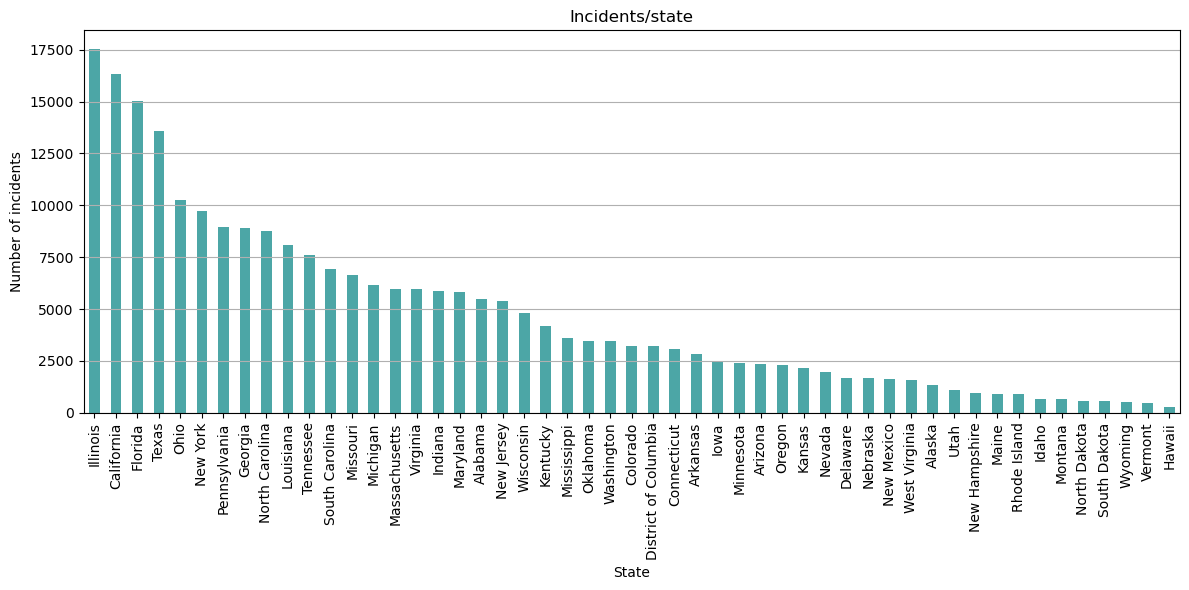

In [3453]:
incidents_per_state = incidents_df['state'].value_counts()

plt.figure(figsize=(12, 6))
incidents_per_state.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/state')
plt.xlabel('State')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### City or County

We check if the column contains null values.

In [3454]:
incidents_df['city_or_county'].isnull().sum()

0

The column doesn't contains null values. Now we do a first qualitative check to see if there are outliers. We consider the last unique 50 cities or counties since it's not possible to perform an exhaustive search.

In [3455]:
incidents_df['city_or_county'].value_counts().tail(50)


Tazlina                           1
Plainville (Epsom)                1
Fairport                          1
Letcher                           1
Sharpsville                       1
Helendale                         1
Kennewick (Finley)                1
Edgeley                           1
Telfair County                    1
Wittman                           1
Boulder County                    1
Tornillo                          1
Kewaunee                          1
West Glacier                      1
Robeline                          1
Lockbourne                        1
Cartwright                        1
Latonia                           1
Grand Gorge                       1
Roxbury Township                  1
Dwight                            1
Denham Springs                    1
Hortonville (Medina)              1
Dickinson (county)                1
Tracyton                          1
Saint Louis (St. Louis)           1
Eureka Springs                    1
Campbells Creek             

In [3456]:
incidents_df[incidents_df['city_or_county'] == 'Orange'].head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
3421,2016-02-16,Texas,Orange,1704 Main Avenue,30.0920,-93.7473,36.0,21.0,3.0,19.0,...,2.0,0.0,0,1,1.0,0.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
9768,2015-11-09,California,Orange,NaN,33.7878,-117.8550,46.0,68.0,37.0,26.0,...,2.0,0.0,2,0,0.0,0.0,2.0,shot then burned in car,"Shot - Dead (murder, accidental, suicide)",NaN
15313,2017-01-21,New Jersey,Orange,Elizabeth Street,40.7792,-74.2270,10.0,34.0,34.0,NaN,...,1.0,0.0,0,1,0.0,0.0,1.0,NaN,Shot - Wounded/Injured,NaN
16310,2014-01-05,New Jersey,Orange,700 block of Scotland Road,40.7583,-74.2489,10.0,34.0,34.0,27.0,...,3.0,0.0,0,1,0.0,0.0,3.0,NaN,Shot - Wounded/Injured,NaN
17631,2016-07-28,New Jersey,Orange,100 block of Park Street,40.7729,-74.2238,10.0,34.0,34.0,26.0,...,1.0,0.0,1,0,0.0,0.0,1.0,near Park Ave,"Shot - Dead (murder, accidental, suicide)",NaN


In [3457]:
incidents_df[incidents_df['city_or_county'].str.contains('Orange \(county\)')].head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
65,2015-10-05,Florida,Orange (county),Belco Drive,28.5805,-81.4528,5.0,45.0,12.0,16.0,...,1.0,0.0,0,1,0.0,0.0,1.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
3771,2016-01-04,Florida,Orange (county),1966 Ole Heritage Drive,28.4811,-81.4042,5.0,46.0,12.0,NaN,...,NaN,NaN,0,3,0.0,0.0,3.0,NaN,Shot - Wounded/Injured,NaN
6810,2015-08-01,Florida,Orange (county),Rubens Court,28.6074,-81.4737,5.0,45.0,12.0,45.0,...,1.0,1.0,1,0,1.0,0.0,2.0,NaN,"Shot - Dead (murder, accidental, suicide)",NaN
6980,2015-09-28,Florida,Orange (county),9140 1st Avenue,28.4340,-81.3686,9.0,48.0,14.0,33.0,...,1.0,1.0,0,1,1.0,0.0,2.0,NaN,Shot - Wounded/Injured,Drug involvement
15749,2030-07-09,Florida,Orange (county),Apopka Boulevard,28.6623,-81.5344,5.0,45.0,12.0,NaN,...,3.0,0.0,0,0,0.0,3.0,3.0,NaN,Non-Shooting Incident,Home Invasion


In [3458]:
incidents_df[incidents_df['city_or_county'].str.contains('Minneapolis')]["city_or_county"].value_counts()

Minneapolis                       667
Minneapolis (Brooklyn Center)      18
Minneapolis (Brooklyn Park)        15
Minneapolis (Fridley)              11
Minneapolis (Blaine)               10
Minneapolis (Crystal)               9
Minneapolis (Bloomington)           9
Minneapolis (Plymouth)              9
Minneapolis (Coon Rapids)           8
Minneapolis (Columbia Heights)      6
Minneapolis (Edina)                 5
Minneapolis (Richfield)             5
Minneapolis (New Hope)              3
Minneapolis (Golden Valley)         3
Minneapolis (Robbinsdale)           3
Minneapolis (St Louis Park)         1
Minneapolis (Spring Lake Park)      1
Minneapolis (Saint Anthony)         1
Name: city_or_county, dtype: int64

Cercando tra le città o le contee con solo un'occorrenza, abbiamo notato che alcune presentano la dicitura '(county)'. Abbiamo fatto un'ulteriore ricerca per vedere se una stessa contea fosse presente sia con sia senza la dicitura '(county)' e gli esiti sono stati positivi, come nell'esempio riportato qui sopra. Quindi, riteniamo necessario sostituire tutte le contee che presentano questa dicitura con solo il nome della contea.

Da questa doppia verifica possiamo evincere che le diciture tra parentesi non vanno ad indicare luoghi differenti, andando solo ad aggiungere sotto-borghi differenti. Nella fase successiva andremo ad eliminare i valori tra parentesi.

Inoltre, da questa analisi è emerso che esistono città e contee con lo stesso nome ma in stati diversi. Da questo deduciamo che in tutte le analisi la colonna city_or_county non potrà mai essere presa da sola ma necessariamente in combinazione con lo stato.


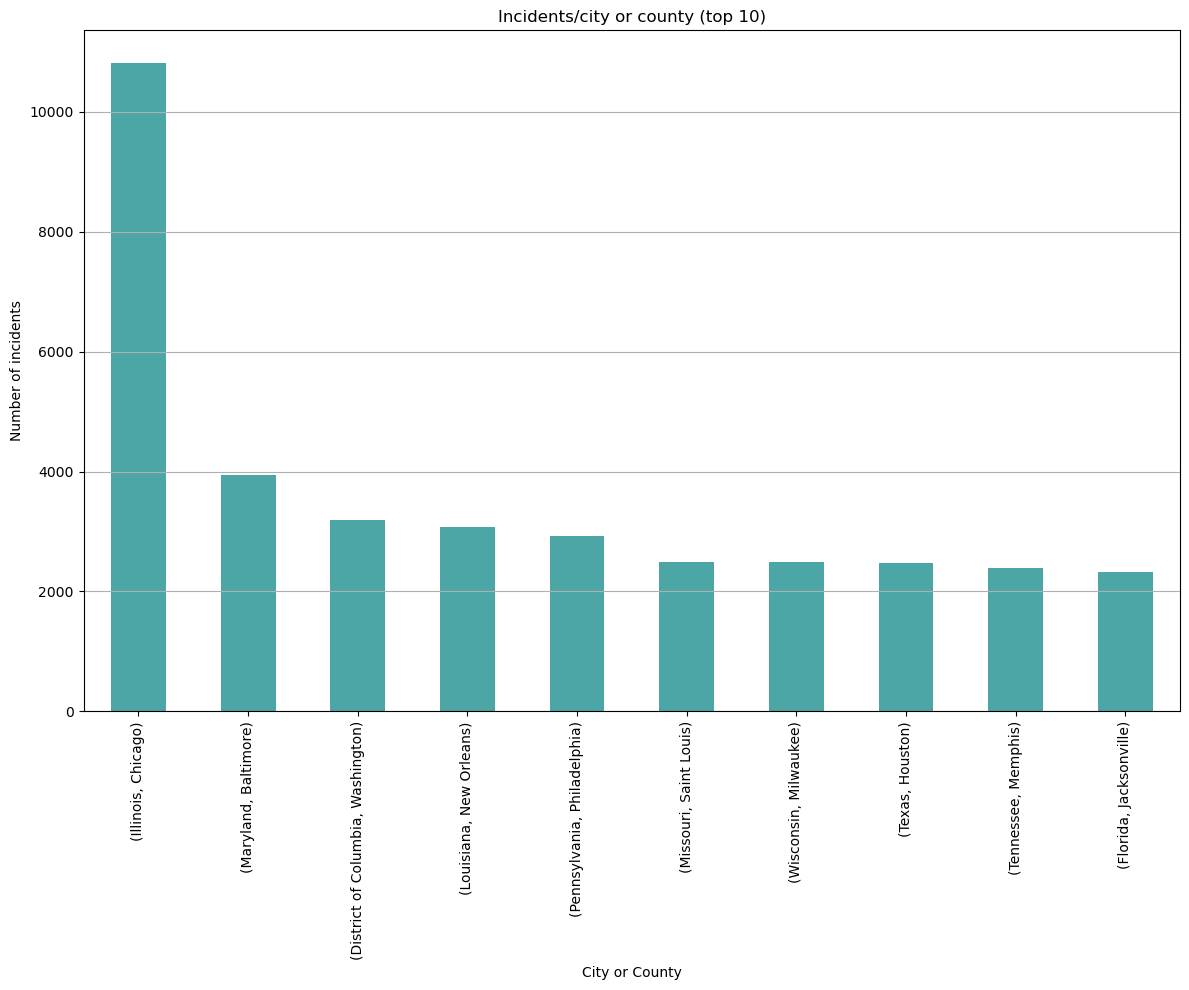

In [3459]:
incidents_per_city_or_county = incidents_df[['state', 'city_or_county']].value_counts().head(10)

plt.figure(figsize=(12, 10))
incidents_per_city_or_county.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/city or county (top 10)')
plt.xlabel('City or County')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

It turns out that Chigago is the city where most of the incidents happens.

### Address

In [3460]:
incidents_df['address'].isnull().sum()

16497

In [3461]:
#((incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()])[~(incidents_df['address'].isnull())]
lat_null = incidents_df[incidents_df['latitude'].isnull()]
long_null = incidents_df[incidents_df['longitude'].isnull()]

coordinates_null = pd.concat([lat_null, long_null], axis=0)
coordinates_null.drop_duplicates(inplace=True)
coordinates_null[~(incidents_df['address'].isnull())]

/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/1451798060.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coordinates_null[~(incidents_df['address'].isnull())]


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
33,2017-10-13,West Virginia,Huntington,2800 block of Hite Ave,NaN,NaN,NaN,NaN,NaN,28.0,...,1.0,0.0,1,0,0.0,0.0,1.0,body shot dead found inside vehicle,"Shot - Dead (murder, accidental, suicide)",NaN
84,2016-10-05,Virginia,Charlottesville,400 block of Garrett Street,NaN,NaN,NaN,NaN,NaN,19.0,...,2.0,0.0,0,1,1.0,0.0,2.0,man shot found in 200 block of Monticello Avenue at 2nd Street,Shot - Wounded/Injured,Possession (gun(s) found during commission of other crimes)
122,2017-09-26,Illinois,Kankakee,500 block of N Indiana Ave,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,black Taurus gun loaded w/ 15 rounds stolen from home;,Non-Shooting Incident,Gun(s) stolen from owner
292,2018-03-08,Tennessee,Portland,Fountain Head Road,NaN,NaN,NaN,NaN,NaN,82.0,...,2.0,0.0,0,2,1.0,0.0,3.0,suspect shot man and man's son who while in van with baby,Shot - Wounded/Injured,NaN
308,2015-03-26,Michigan,Clinton Township,39900 block of Garfield Rd,NaN,NaN,NaN,NaN,NaN,50.0,...,2.0,0.0,1,1,1.0,0.0,2.0,"Bernie’s Market - Store owner has gun battle w/ robber, is killed; robber wounded; 2 suspects arrested, incl shooter.;\r\r\r\r\n42.590501, -82.951411",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239466,2018-02-08,New York,Bronx,Colden Ave,NaN,NaN,NaN,NaN,NaN,53.0,...,1.0,0.0,0,0,1.0,0.0,1.0,Off duty NYC corrections officer; Fired shot into car tire after driver wrecked vehicle outside his home.,Shots Fired - No Injuries,NaN
239489,2018-03-31,Pennsylvania,Easton,300 block of Palmer St,NaN,NaN,NaN,NaN,NaN,34.0,...,1.0,0.0,0,1,0.0,0.0,1.0,car-to-street db,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
239508,2016-05-10,Pennsylvania,Lebanon,1102 Jackson Blvd,NaN,NaN,NaN,NaN,NaN,28.0,...,2.0,0.0,1,0,1.0,0.0,2.0,Lebanon Court Apartments,"Shot - Dead (murder, accidental, suicide)",Drug involvement
239532,2018-02-28,Washington,Moses Lake,800 block of Sharon Ave E,NaN,NaN,NaN,NaN,NaN,14.0,...,1.0,0.0,0,0,1.0,0.0,1.0,"student with handgun near HS, NOT ON CAMPUS",Non-Shooting Incident,ATF/LE Confiscation/Raid/Arrest


Riteniamo che l'indirizzo non aggiunga valore a fini statistici per vari motivi:
1. Può essere sostituito dalla coppia lat, long
2. In assenza di lat e long, gli indirizzi coprirebbero solo 7604 esempi che sono una porzione molto ristretta del dataset.

Quindi abbiamo pensato di eliminare la colonna address.

### Latitude and Longitude

In [3462]:
incidents_df['latitude'].isnull().sum()

7923

In [3463]:
incidents_df['longitude'].isnull().sum()

7923

In [3464]:
len((incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()])

/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/2909038309.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len((incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()])


7923

From this we deduce that latitude and longitude are always NaN pairwise.

In [3465]:
(incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()].head(10)

/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/3511305411.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()].head(10)


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
33,2017-10-13,West Virginia,Huntington,2800 block of Hite Ave,NaN,NaN,NaN,NaN,NaN,28.0,...,1.0,0.0,1,0,0.0,0.0,1.0,body shot dead found inside vehicle,"Shot - Dead (murder, accidental, suicide)",NaN
84,2016-10-05,Virginia,Charlottesville,400 block of Garrett Street,NaN,NaN,NaN,NaN,NaN,19.0,...,2.0,0.0,0,1,1.0,0.0,2.0,man shot found in 200 block of Monticello Avenue at 2nd Street,Shot - Wounded/Injured,Possession (gun(s) found during commission of other crimes)
122,2017-09-26,Illinois,Kankakee,500 block of N Indiana Ave,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,black Taurus gun loaded w/ 15 rounds stolen from home;,Non-Shooting Incident,Gun(s) stolen from owner
292,2018-03-08,Tennessee,Portland,Fountain Head Road,NaN,NaN,NaN,NaN,NaN,82.0,...,2.0,0.0,0,2,1.0,0.0,3.0,suspect shot man and man's son who while in van with baby,Shot - Wounded/Injured,NaN
308,2015-03-26,Michigan,Clinton Township,39900 block of Garfield Rd,NaN,NaN,NaN,NaN,NaN,50.0,...,2.0,0.0,1,1,1.0,0.0,2.0,"Bernie’s Market - Store owner has gun battle w/ robber, is killed; robber wounded; 2 suspects arrested, incl shooter.;\r\r\r\r\n42.590501, -82.951411",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
320,2017-08-08,Pennsylvania,Philadelphia,6800 block of Lansdowne Ave,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0,0,0.0,1.0,1.0,NaN,Non-Shooting Incident,Gun(s) stolen from owner
350,2016-10-04,Indiana,Indianapolis,3821 Industrial Blvd,NaN,NaN,NaN,NaN,NaN,21.0,...,1.0,0.0,0,0,1.0,0.0,1.0,"IMPD district headquarters fired on a least 12 times w/ high powered rifle, damaging building; murder suspect in custody;",Institution/Group/Business,Shots Fired - No Injuries
360,2016-10-03,Texas,Palestine,500 block of West Point Tap Road,NaN,NaN,NaN,NaN,NaN,28.0,...,2.0,0.0,1,0,1.0,0.0,2.0,1 killed.,"Shot - Dead (murder, accidental, suicide)",NaN
462,2016-11-12,South Carolina,Charleston,Staffordshire Drive and Little John Drive,NaN,NaN,NaN,NaN,NaN,28.0,...,1.0,0.0,0,0,1.0,0.0,1.0,NaN,Shots Fired - No Injuries,NaN
485,2016-10-13,Arkansas,Little Rock,5300 block of Lynch Drive,NaN,NaN,NaN,NaN,NaN,37.0,...,2.0,0.0,1,0,1.0,0.0,2.0,CV1SHOT,"Shot - Dead (murder, accidental, suicide)",NaN


In [3466]:
lat_long_null = (incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()]
print(f"Number of Lat and Long NaN: {len(lat_long_null)}")
print(f"Number of state_senate_district NaN when Lat and Long are NaN: {lat_null['state_senate_district'].isnull().sum()}")
print(f"Number of congressional_district NaN when Lat and Long are NaN: {lat_null['congressional_district'].isnull().sum()}")
print(f"Number of state_house_district NaN when Lat and Long are NaN: {lat_null['state_house_district'].isnull().sum()}")

Number of Lat and Long NaN: 7923
Number of state_senate_district NaN when Lat and Long are NaN: 7916
Number of congressional_district NaN when Lat and Long are NaN: 7913
Number of state_house_district NaN when Lat and Long are NaN: 7921


/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/598262625.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lat_long_null = (incidents_df[incidents_df['latitude'].isnull()])[incidents_df['longitude'].isnull()]


We notice that whenever latitude and longitude are NaN, the majority of time state_senate_district, congressional_district and state_house_district are NaN.

### Congressional district

In [3467]:
incidents_df['congressional_district'].isnull().sum()

11944

In [3468]:
incidents_df[incidents_df['congressional_district'] == 0].head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
1007,2018-01-07,Montana,Missoula,1500 block of Toole,46.8780,-114.0120,0.0,95.0,48.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,"gun report stolen from vehicle, DATE LOG PUB",Non-Shooting Incident,Gun(s) stolen from owner
2146,2018-03-07,North Dakota,Minot,1600 block of Terrace Dr,48.2516,-101.3130,0.0,40.0,40.0,18.0,...,1.0,0.0,0,1,0.0,0.0,1.0,shot multiple times,Shot - Wounded/Injured,NaN
3199,2017-10-23,Montana,Billings,917 N 19th St,45.7953,-108.5020,0.0,47.0,24.0,35.0,...,1.0,0.0,0,1,0.0,0.0,1.0,shot in back,Shot - Wounded/Injured,NaN
3507,2017-01-08,Delaware,Wilmington,200 block of Porter St,39.7412,-75.5636,0.0,3.0,3.0,32.0,...,1.0,0.0,1,0,0.0,0.0,1.0,"39.741036, -75.563691 ;","Shot - Dead (murder, accidental, suicide)",NaN
4490,2017-11-06,Delaware,Wilmington,2400 block of N Market St,39.7536,-75.5375,0.0,1.0,2.0,16.0,...,2.0,0.0,0,2,0.0,0.0,2.0,"Lower Brandywine Village neighborhood, around 6pm",Shot - Wounded/Injured,ShotSpotter


In [3469]:
(incidents_df[incidents_df['state'] == 'North Dakota'])['congressional_district'].unique() #TODO Da rivalutare

array([ 1.,  0., nan])

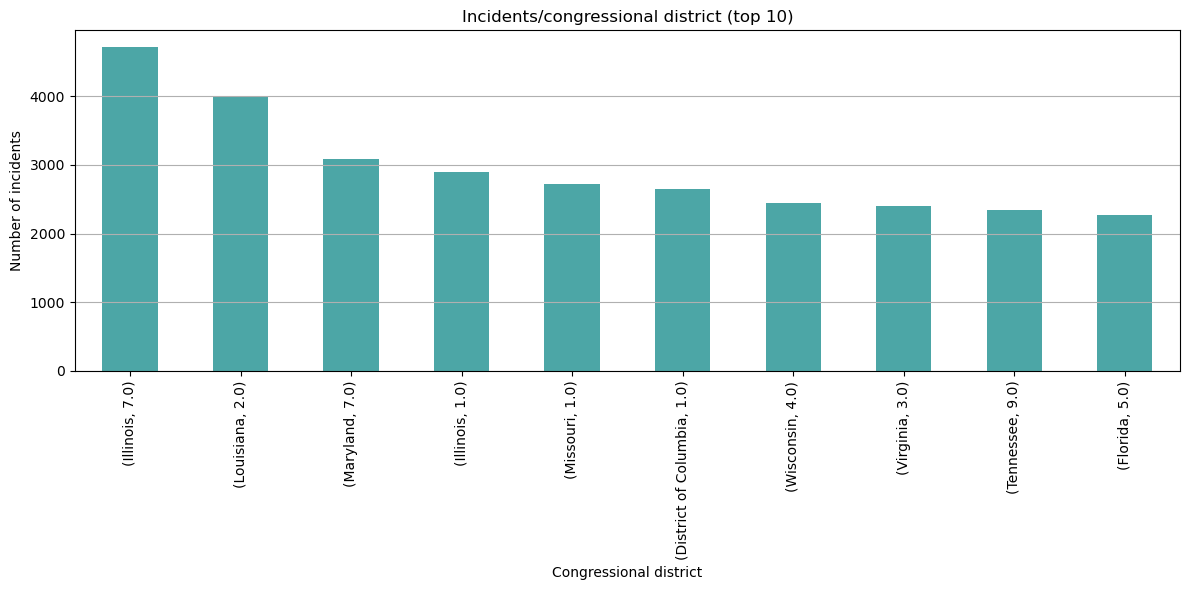

In [3470]:
incidents_per_congressional_district = incidents_df[['state', 'congressional_district']].value_counts().head(10)

plt.figure(figsize=(12, 6))
incidents_per_congressional_district.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/congressional district (top 10)')
plt.xlabel('Congressional district')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### State house district

In [3471]:
incidents_df['state_house_district'].isnull().sum()

38772

In [3472]:
incidents_df[incidents_df['state_house_district'] > 400]['state_house_district'].count()

94

The maximum number of state house vary for each state. The over maximum is 400 which is registered the state of New Hampshire. So, to detect outliers, we count the number of rows that has state_house_district greater then 400.

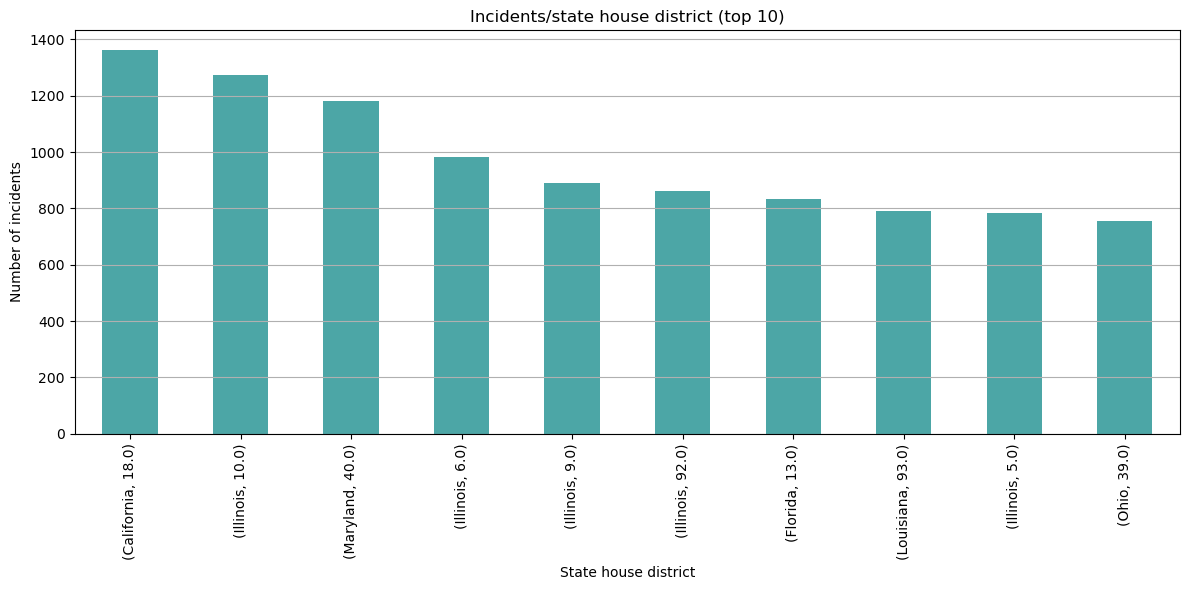

In [3473]:
incidents_per_state_house_district = incidents_df[['state', 'state_house_district']].value_counts().head(10)

plt.figure(figsize=(12, 6))
incidents_per_state_house_district.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/state house district (top 10)')
plt.xlabel('State house district')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

We notice that there are five state house districts from the state of Illinois in the top 10. That is coherent with the previous analysis that gave the state of Illinois as the state with more incidents.

### State senate district

In [3474]:
incidents_df['state_senate_district'].isnull().sum()

32335

In [3475]:
incidents_df[incidents_df['state_senate_district'] > 63]['state_senate_district'].count()

247

The maximum number of state senate vary for each state. The maximum over all the maximums is 63 which is for the state of New York. So, to detect outliers, we count the number of rows that has state_senate_district greater then 63.

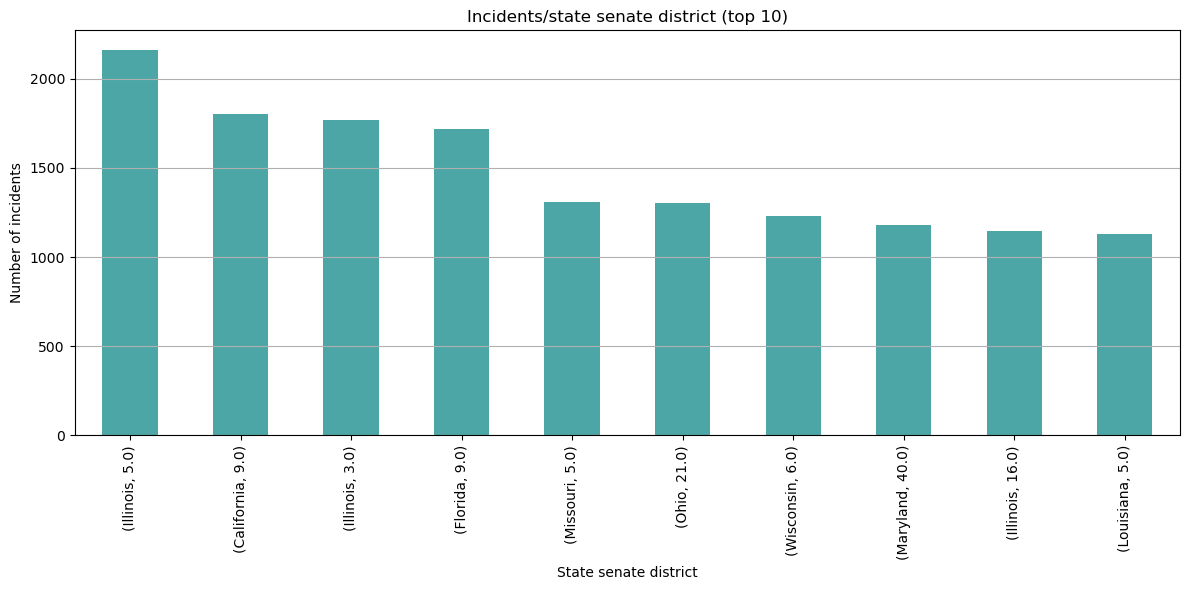

In [3476]:
incidents_per_state_senate_district = incidents_df[['state', 'state_senate_district']].value_counts().head(10)

plt.figure(figsize=(12, 6))
incidents_per_state_senate_district.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/state senate district (top 10)')
plt.xlabel('State senate district')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Here the situation is a little bit different. There are only three state senate districts of Illinois in the top 10 but it's still the state with more occurrences in this top 10.

### Participant age1

In [3477]:
incidents_df['participant_age1'].isnull().sum()

92298

Text(0.5, 1.0, 'Adult 18+')

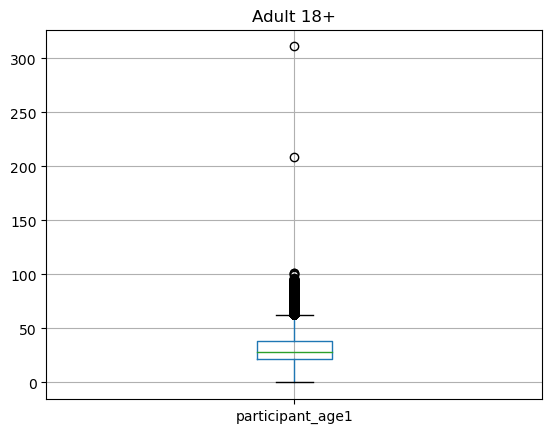

In [3478]:
adults = incidents_df[incidents_df['participant_age_group1'] == 'Adult 18+']

boxplot_adults = adults.boxplot(column=["participant_age1"])
boxplot_adults.set_title("Adult 18+")

From this boxplot we notice that the are clearly two outliers of around 200 and 300 years old. Further analysis must be done for the other points outside the upperbound of the boxplot

In [3479]:
adults['participant_age1'].describe()

count    132994.000000
mean         31.996000
std          12.857504
min           0.000000
25%          22.000000
50%          28.000000
75%          38.000000
max         311.000000
Name: participant_age1, dtype: float64

Text(0.5, 1.0, 'Child 0-11')

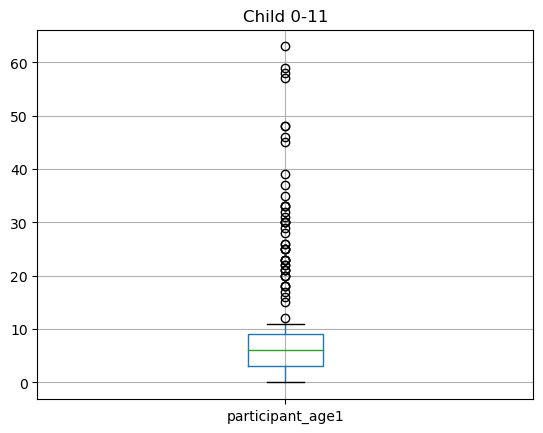

In [3480]:
child = incidents_df[incidents_df['participant_age_group1'] == 'Child 0-11']

boxplot_child = child.boxplot(column=["participant_age1"], whis=[0, 90])
boxplot_child.set_title("Child 0-11")


We notice that all these points outstide the boxplot are outliers compared to the participant_age_group1.

In [3481]:
child['participant_age1'].describe()

count    2367.000000
mean        6.539079
std         4.914490
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        63.000000
Name: participant_age1, dtype: float64

In [3482]:
# child_not_null = child[~child['participant_age1'].isnull()]

# np.percentile(child_not_null['participant_age1'], 90)

Text(0.5, 1.0, 'Teen 12-17')

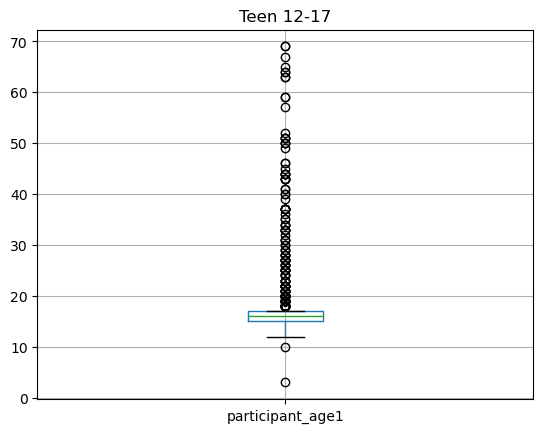

In [3483]:
teen = incidents_df[incidents_df['participant_age_group1'] == 'Teen 12-17']

boxplot_teen = teen.boxplot(column=["participant_age1"], whis=[3, 90])
boxplot_teen.set_title("Teen 12-17")

We notice that all these points outstide the boxplot are outliers compared to the participant_age_group1.

In [3484]:
teen['participant_age1'].describe()

count    11822.000000
mean        15.914820
std          2.623729
min          3.000000
25%         15.000000
50%         16.000000
75%         17.000000
max         69.000000
Name: participant_age1, dtype: float64

In [3485]:
# teen_not_null = teen[~teen['participant_age1'].isnull()]

# np.percentile(teen_not_null['participant_age1'], 3)
# np.percentile(teen_not_null['participant_age1'], 90)

In [3486]:
adults_upperbound = 38 + 1.5 * (38-22)
child_upperbound = 11
teen_upperbound = 17

adults_outliers = adults[adults['participant_age1'] < 18]['participant_age1'].count() + adults[adults['participant_age1'] > adults_upperbound]['participant_age1'].count()
child_outliers = child[child['participant_age1'] > child_upperbound ]['participant_age1'].count()
teen_outliers = teen[teen['participant_age1'] < 12]['participant_age1'].count() + teen[teen['participant_age1'] > teen_upperbound]['participant_age1'].count()

print(f"Adults outliers: {adults_outliers}")
print(f"Child outliers: {child_outliers}")
print(f"Teen outliers: {teen_outliers}")


Adults outliers: 5175
Child outliers: 47
Teen outliers: 207


Dopo l'analisi degli outlier abbiamo notato che:
1. Pochi outlier -> Deduciamo che la persona scelta randomicamente per inserire l'età e l'age group siano la stessa.
2. Child e teen presentano dei miss-labeling che possono essere aggiustati attraverso un processo di riassegnazione dell'etichetta (in questo modo di eliminano gli outliers per questi due gruppi). Assumiamo che l'età inserita sia quella corretta (visto che comunque gli outlier sono pochi)
3. Andremo ad eliminare gli outlier evidenti in adults (i.e. 200 e 300) e occorre un'analisi più accurata sulla distribuzione (dopo aver eliminato gli outlier di teen, child e quelli evidenti in adults) per verificare i restanti outlier.

### Participant age group1

In [3487]:
incidents_df['participant_age_group1'].isnull().sum()

#TODO Vedere se conviene fare il contrario. Ovvero che in base al gruppo assegnamo un'età

42119

Nonostante siano tanti, possiamo risolvere tutti questi valori nulli in base all'età (ovviamente per quei record che hanno l'età non nulla).

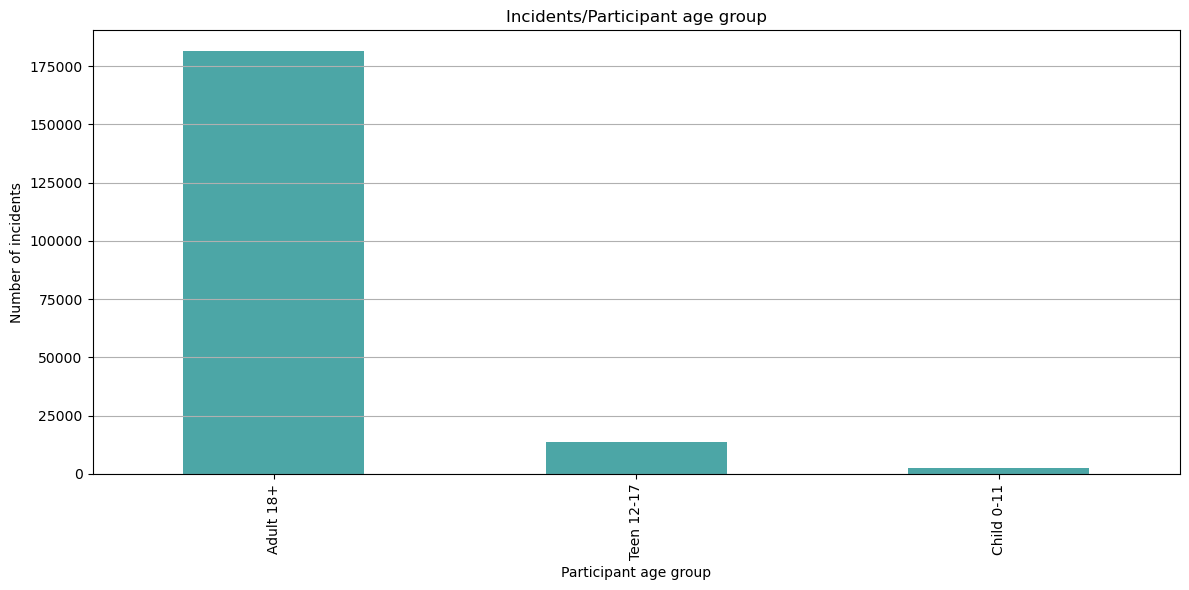

In [3488]:
plt.figure(figsize=(12, 6))
incidents_df['participant_age_group1'].value_counts().plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/Participant age group')
plt.xlabel('Participant age group')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The plot confirms the expectation about the most frequent age group.

### Participant gender1

In [3489]:
incidents_df['participant_gender1'].isnull().sum()

36362

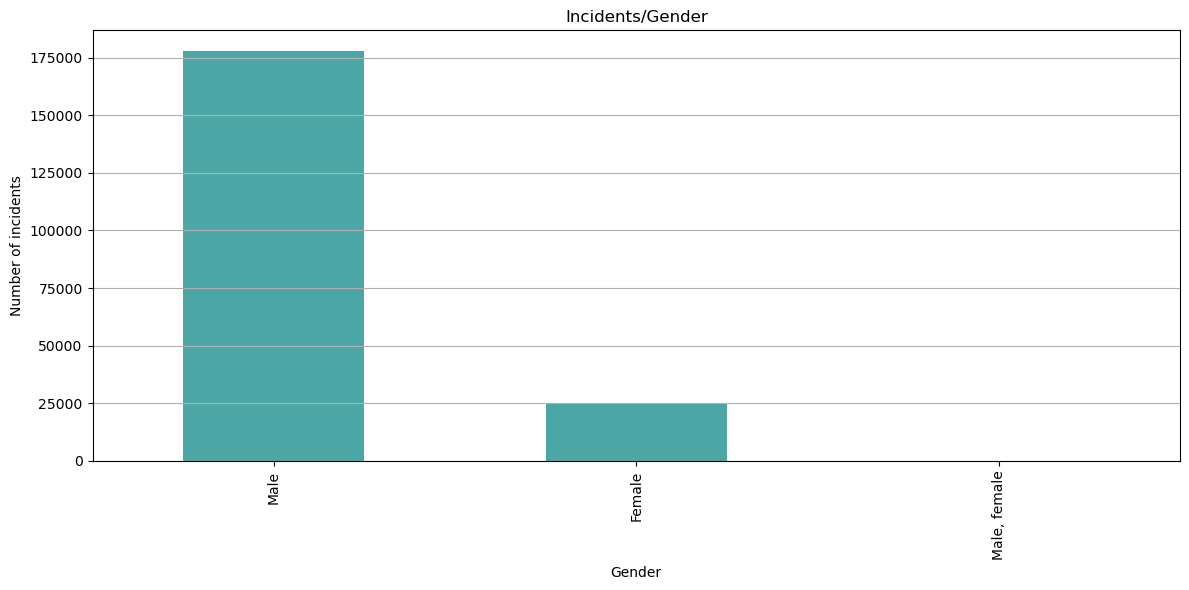

In [3490]:
plt.figure(figsize=(12, 6))
incidents_df['participant_gender1'].value_counts().plot(kind='bar', color='teal', alpha=0.7)
plt.title('Incidents/Gender')
plt.xlabel('Gender')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3491]:
incidents_df['participant_gender1'].value_counts()

Male            177945
Female           25369
Male, female         1
Name: participant_gender1, dtype: int64

Notiamo che c'è un solo esempio con la il valore 'Male, female' e quindi assumiamo che sia un errore. Inoltre osserviamo che il numero di maschi coinvolti negli incidenti sia in numer molto maggiore rispetto a quello delle femmine.

### Min age participants

In [3492]:
initial_null_values = incidents_df['min_age_participants'].isnull().sum()
initial_null_values

74798

In [3493]:
incidents_df['min_age_participants'].value_counts()

19.0         7981
18.0         7906
20.0         7316
21.0         7301
22.0         7092
             ... 
sqo390bo4       1
5kh             1
bsf             1
231950          1
560583          1
Name: min_age_participants, Length: 12673, dtype: int64

Considerando un massimo di 120 valori distinti per l'età, da una analisi preliminare notiamo che questi sono in un numero nettamente maggiore e sono evidenti due tipi di outlier: valori di tipo stringa in un campo numerico e dei valori troppo alti per essere delle età. Pertanto è necessario analizzare ulteriormente questa colonna. 

In [3494]:
incidents_df['min_age_participants'] = pd.to_numeric(incidents_df['min_age_participants'], errors='coerce')
null_values_after_conversion = incidents_df['min_age_participants'].isnull().sum()
#null_values_after_conversion

null_values_after_conversion - initial_null_values

5753

Questa ulteriore analisi individua 5753 valori che non sono numerici. Procediamo a verificare i restanti outlier numerici.

In [3495]:
incidents_df['min_age_participants'].describe()

count    1.591260e+05
mean     5.674359e+06
std      2.256171e+09
min     -1.000000e+03
25%      1.900000e+01
50%      2.500000e+01
75%      3.500000e+01
max      9.000000e+11
Name: min_age_participants, dtype: float64

In [3496]:
incidents_df[incidents_df['min_age_participants'] < 0]['min_age_participants'].count() + incidents_df[incidents_df['min_age_participants'] > 120]['min_age_participants'].count()

11745

Notiamo che ci sono sia valori molto grandi che valori molto piccoli al di sotto dello zero.

In [3497]:
min_age_filtered_df = incidents_df[incidents_df['min_age_participants'] >= 0][incidents_df['min_age_participants'] < 120]
min_age_filtered_df['min_age_participants'].describe()


/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/3393651543.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_age_filtered_df = incidents_df[incidents_df['min_age_participants'] >= 0][incidents_df['min_age_participants'] < 120]


count    147381.000000
mean         28.333360
std          12.477595
min           0.000000
25%          20.000000
50%          25.000000
75%          34.000000
max         101.000000
Name: min_age_participants, dtype: float64

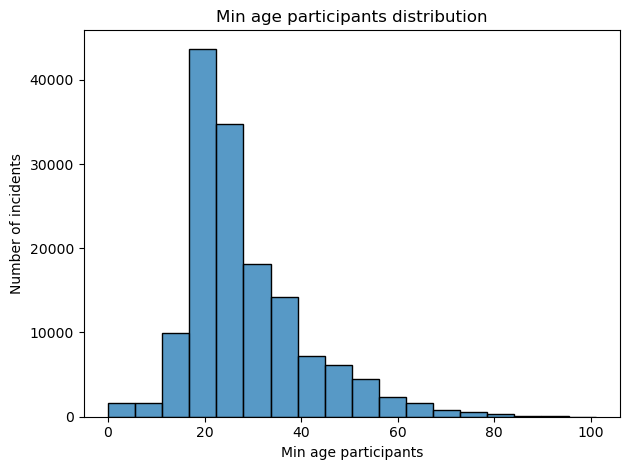

In [3498]:
sns.histplot(min_age_filtered_df['min_age_participants'], bins=round(np.log2(len(min_age_filtered_df['min_age_participants'])) + 1))
plt.title('Min age participants distribution')
plt.xlabel('Min age participants')
plt.ylabel('Number of incidents')
plt.tight_layout()
plt.show()

Come confermato dal describe, il maggior numero di persone coinvolte in un incidente ha una età compresa tra i 20 e i 35 anni. Questo risultato l'abbiamo ottenuto filtrando momentaneamente tutti gli outlier presenti nella colonna. 

### Avg age participants

In [3499]:
initial_null_values_avg_age = incidents_df['avg_age_participants'].isnull().sum()
initial_null_values_avg_age

74620

In [3500]:
incidents_df['avg_age_participants'].value_counts()

22.0          7606
20.0          7468
24.0          7429
18.0          7064
26.0          6576
              ... 
hl7bfwij6        1
159833           1
5rm6na2sbp       1
527697           1
rac5t            1
Name: avg_age_participants, Length: 12869, dtype: int64

Anche per questa colonna si presentano gli stessi problemi della precedente. Per questo motivo replichiamo le stesse analisi.

In [3501]:
incidents_df['avg_age_participants'] = pd.to_numeric(incidents_df['avg_age_participants'], errors='coerce')
null_values_after_conversion_av_age = incidents_df['avg_age_participants'].isnull().sum()

null_values_after_conversion_av_age - initial_null_values_avg_age

5889

In [3502]:
incidents_df['avg_age_participants'].describe()

count    1.591680e+05
mean     2.446181e+04
std      2.199489e+06
min     -1.000000e+03
25%      2.100000e+01
50%      2.700000e+01
75%      3.700000e+01
max      8.719163e+08
Name: avg_age_participants, dtype: float64

In [3503]:
avg_age_filtered_df = incidents_df[incidents_df['avg_age_participants'] >= 0][incidents_df['avg_age_participants'] < 122]
avg_age_filtered_df['avg_age_participants'].describe()


/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/1667034356.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_age_filtered_df = incidents_df[incidents_df['avg_age_participants'] >= 0][incidents_df['avg_age_participants'] < 122]


count    147377.000000
mean         29.996153
std          12.438917
min           0.000000
25%          21.000000
50%          27.000000
75%          36.000000
max         101.000000
Name: avg_age_participants, dtype: float64

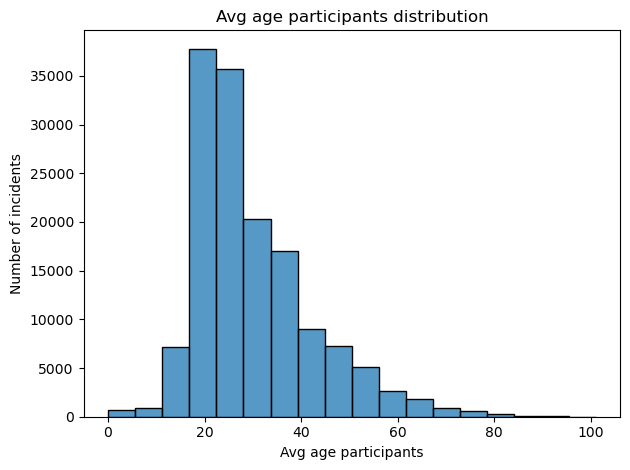

In [3504]:
sns.histplot(avg_age_filtered_df['avg_age_participants'], bins=round(np.log2(len(avg_age_filtered_df['avg_age_participants'])) + 1))
plt.title('Avg age participants distribution')
plt.xlabel('Avg age participants')
plt.ylabel('Number of incidents')
plt.tight_layout()
plt.show()

Come confermato dal describe, il maggior numero di persone coinvolte in un incidente ha una età media compresa tra i 20 e i 35 anni. Questo risultato l'abbiamo ottenuto filtrando momentaneamente tutti gli outlier presenti nella colonna. 

### Max age participants

In [3505]:
initial_null_values_max_age = incidents_df['max_age_participants'].isnull().sum()
initial_null_values_max_age

74708

In [3506]:
incidents_df['max_age_participants'].value_counts()

24.0          6237
23.0          6231
22.0          6190
19.0          6149
20.0          6083
              ... 
h694an47r        1
n5mwj54x         1
d5emhp29q        1
137644           1
lzgwvzj8uv       1
Name: max_age_participants, Length: 12852, dtype: int64

In [3507]:
incidents_df['max_age_participants'] = pd.to_numeric(incidents_df['max_age_participants'], errors='coerce')
null_values_after_conversion_max_age = incidents_df['max_age_participants'].isnull().sum()


null_values_after_conversion_max_age - initial_null_values_max_age

5885

In [3508]:
incidents_df['max_age_participants'].describe()

count    1.590840e+05
mean     1.871406e+04
std      1.071527e+05
min     -1.000000e+03
25%      2.100000e+01
50%      2.800000e+01
75%      4.000000e+01
max      8.300000e+06
Name: max_age_participants, dtype: float64

In [3509]:
max_age_filtered_df = incidents_df[incidents_df['max_age_participants'] >= 0][incidents_df['max_age_participants'] < 122]
max_age_filtered_df['max_age_participants'].describe()


/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_21156/4056388857.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_age_filtered_df = incidents_df[incidents_df['max_age_participants'] >= 0][incidents_df['max_age_participants'] < 122]


count    147378.000000
mean         31.800852
std          13.693545
min           0.000000
25%          22.000000
50%          28.000000
75%          38.000000
max         101.000000
Name: max_age_participants, dtype: float64

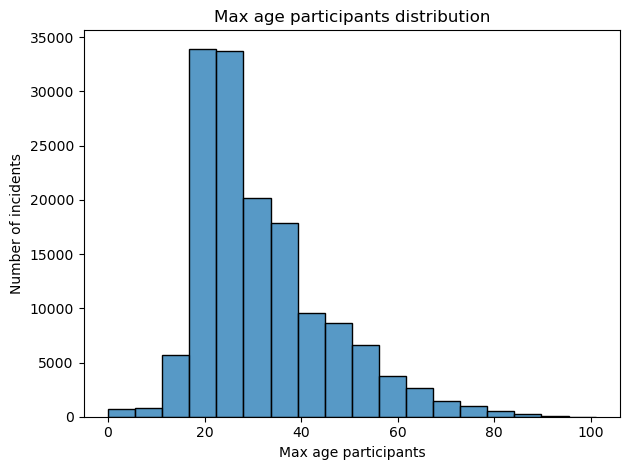

In [3510]:
sns.histplot(max_age_filtered_df['max_age_participants'], bins=round(np.log2(len(max_age_filtered_df['max_age_participants'])) + 1))
plt.title('Max age participants distribution')
plt.xlabel('Max age participants')
plt.ylabel('Number of incidents')
plt.tight_layout()
plt.show()

Possiamo notare che in questo caso ci sono due bin che hanno quasi lo stesso valore quindi l'età registrata più frequentemente è tra i 19 e 30 anni circa.

### N participants child

In [3511]:
incidents_df['n_participants_child'].isnull().sum()

42104

In [3512]:
#incidents_df['n_participants_child'].value_counts()

In [3513]:
incidents_df['n_participants_child'].unique() #unique helps to distinguish between numeric and string values, not clear from the value_counts()

array([0.0, nan, 1.0, 2.0, 3.0, 835473.0, 5.0, 4.0, 124130.0, 436587.0,
       '0.0', '2.0', '1.0', '4.0', '3.0', '6yb1lceu3v', '5.0', '6.0',
       '7.0', '886365.0', 'z6sp', '607874', '292381', '-73', '11.0',
       '25yerfqn6', 7.0, 8.0, '-977.0', '77mw3iw3', '-884.0', 'j34',
       -252.0], dtype=object)

Da un'analisi preliminare possiamo notare che nella colonna sono presenti sia valori numerici sia valori numerici espressi come stringhe. Inoltre, possiamo osservare:
1. la presenza di outlier di tipo stringa che non rappresentano alcun valore numerico;
2. la presenza di outlier rappresentati da numeri negativi;
3. la presenza di outlier rappresentati da numeri molto grandi da investigare.  

Per questo, proseguiamo con una ulteriore e più approfondita analisi.

In [3514]:
#to eliminate non-numeric string values 
incidents_df['n_participants_child'] = pd.to_numeric(incidents_df['n_participants_child'], errors='coerce')

In [3515]:
incidents_df['n_participants_child'].value_counts()

 0.0         193852
 1.0           3045
 2.0            536
 3.0             84
 4.0             23
 5.0             10
 6.0              4
 7.0              2
 436587.0         1
 124130.0         1
 835473.0         1
 886365.0         1
 607874.0         1
 292381.0         1
-73.0             1
 11.0             1
 8.0              1
-977.0            1
-884.0            1
-252.0            1
Name: n_participants_child, dtype: int64

In [3516]:
big_values_outliers = list(incidents_df[incidents_df['n_participants_child'] > 200]['n_participants_child']) 

for i in big_values_outliers:
    print(incidents_df[incidents_df['n_participants_child'] == i][['n_participants_child', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

      n_participants_child incident_characteristics1  \
7369              835473.0     Non-Shooting Incident   

                          incident_characteristics2  \
7369  Brandishing/flourishing/open carry/lost/found   

                                                                                     notes  
7369  trucker pointed shotgun at another trucker at rest stop; suspect did not have permit  
----------------------------------------------------------------
       n_participants_child  incident_characteristics1  \
42353              124130.0  Shots Fired - No Injuries   

      incident_characteristics2  \
42353          Drug involvement   

                                                          notes  
42353  at Madison Street, shots fired into the air, 9mm handgun  
----------------------------------------------------------------
       n_participants_child                  incident_characteristics1  \
55030              436587.0  Shot - Dead (murder, accidental, suic

Come possiamo osservare, il numero di bambini coinvolti rappresenta un errore poiché non corrisponde nella maggior parte dei casi alle note o alle caratteristiche dell'incidente in cui sono coinvolti, ad esempio, il record 114617 coinvolge 886365 bambini, ma gli altri attributi comunicano che in realtà si tratta di un incidente domestico in cui il sospettato minaccia la madre con un coltello. 

In [3517]:
negative_value_outliers = list(incidents_df[incidents_df['n_participants_child'] < 0]['n_participants_child'])
for i in negative_value_outliers:
    print(incidents_df[incidents_df['n_participants_child'] == i][['n_participants_child', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

        n_participants_child incident_characteristics1  \
152310                 -73.0     Non-Shooting Incident   

                                                                         incident_characteristics2  \
152310  Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )   

                                                           notes  
152310  loaded 9mm handgun thrown out of car during traffic stop  
----------------------------------------------------------------
        n_participants_child  incident_characteristics1  \
201198                -977.0  Shots Fired - No Injuries   

       incident_characteristics2  \
201198   Non-Aggression Incident   

                                                                                                                                    notes  
201198  AD'd and shot into neighboring apt. Explosives found during search. Charged w Reckless Endangerment and Possession of Explosives.  
-------

Consideriamo il valore negativo come numero di partecipanti bambini come un errore, inoltre, anche nel caso si volesse prenderne solo il valore assoluto, come osservato alla cella precedente emerge che sono numeri abbastanza inverosimili basandosi su caratteristiche e descrizione dell'incidente

### N participants teen

In [3518]:
incidents_df['n_participants_teen'].isnull().sum()

42099

In [3519]:
#incidents_df['n_participants_teen'].value_counts()

In [3520]:
incidents_df['n_participants_teen'].unique() #unique helps to distinguish between numeric and string values, not clear from the value_counts()

array([0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 15.0, -864.0, 6.0, 7.0,
       762487.0, -753.0, -854.0, 444036.0, '0.0', '2.0', '1.0', '3.0',
       '4.0', '5.0', '-138', '10.0', '6.0', 'ymwa4vyx', '9.0', '27.0',
       '7.0', 'akendyt6a', 9.0, -927.0, -130.0, 'x2aqam13iy', '445652',
       'eqsa', '8.0', '-49', 'nt082ps', '-873', '-427', '-947', 'wcrt3x4',
       'p2eyl'], dtype=object)

Da un'analisi preliminare notiamo che valgono le stesse osservazioni fatte in 'n_participants_child' anche nella colonna 'n_participants_teen', quindi ci sono sia valori numerici sia valori numerici espressi come stringhe, ma anche outlier di diversi tipi tra cui:
1. stringhe che non rappresentano alcun valore numerico;
2. numeri negativi;
3. numeri molto grandi da investigare.  

Per questo, proseguiamo con una ulteriore e più approfondita analisi.

In [3521]:
#to eliminate non-numeric string values 
incidents_df['n_participants_teen'] = pd.to_numeric(incidents_df['n_participants_teen'], errors='coerce')

In [3522]:
incidents_df['n_participants_teen'].value_counts()

 0.0         178223
 1.0          14893
 2.0           3227
 3.0            811
 4.0            279
 5.0             82
 6.0             30
 7.0              6
 9.0              3
-873.0            1
 27.0             1
-49.0             1
 8.0              1
 445652.0         1
-427.0            1
-130.0            1
-927.0            1
 444036.0         1
 10.0             1
-138.0            1
-854.0            1
-753.0            1
 762487.0         1
-864.0            1
 15.0             1
-947.0            1
Name: n_participants_teen, dtype: int64

In [3523]:
big_values_outliers = list(incidents_df[incidents_df['n_participants_teen'] > 200]['n_participants_teen'])
for i in big_values_outliers:
    print(incidents_df[incidents_df['n_participants_teen'] == i][['n_participants_teen', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

       n_participants_teen                  incident_characteristics1  \
35995             762487.0  Shot - Dead (murder, accidental, suicide)   

      incident_characteristics2  \
35995                       NaN   

                                                                      notes  
35995  2 men found dead on Route 65 in a sedan near the McKees Rocks Bridge  
----------------------------------------------------------------
       n_participants_teen                  incident_characteristics1  \
60873             444036.0  Shot - Dead (murder, accidental, suicide)   

      incident_characteristics2 notes  
60873                       NaN   NaN  
----------------------------------------------------------------
        n_participants_teen incident_characteristics1  \
151876             445652.0     Non-Shooting Incident   

              incident_characteristics2 notes  
151876  ATF/LE Confiscation/Raid/Arrest   NaN  
----------------------------------------------------------

Anche in questo caso il numero di teenager coinvolti sembra essere eccessivo rispetto agli incidenti, e.g. le note del record 35996 affermano che ci sono solo due uomini trovati morti 

In [3524]:
negative_value_outliers = list(incidents_df[incidents_df['n_participants_teen'] < 0]['n_participants_teen'])
for i in negative_value_outliers:
    print(incidents_df[incidents_df['n_participants_teen'] == i][['n_participants_teen', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

      n_participants_teen incident_characteristics1  \
7369               -864.0     Non-Shooting Incident   

                          incident_characteristics2  \
7369  Brandishing/flourishing/open carry/lost/found   

                                                                                     notes  
7369  trucker pointed shotgun at another trucker at rest stop; suspect did not have permit  
----------------------------------------------------------------
       n_participants_teen  incident_characteristics1  \
42353               -753.0  Shots Fired - No Injuries   

      incident_characteristics2  \
42353          Drug involvement   

                                                          notes  
42353  at Madison Street, shots fired into the air, 9mm handgun  
----------------------------------------------------------------
       n_participants_teen                  incident_characteristics1  \
55030               -854.0  Shot - Dead (murder, accidental, suicide)  

Consideriamo il valore negativo come numero di partecipanti teenager come un errore, inoltre, anche nel caso si volesse prenderne solo il valore assoluto, come osservato alla cella precedente emerge che sono numeri abbastanza inverosimili basandosi su caratteristiche e descrizione dell'incidente

### N participants adult

In [3525]:
incidents_df['n_participants_adult'].isnull().sum()

42102

In [3526]:
incidents_df['n_participants_adult'].unique()

array([1.0, nan, 5.0, 0.0, 3.0, 4.0, 2.0, 6.0, 7.0, 8.0, 10.0, 9.0, 28.0,
       24.0, 12.0, 17.0, 13.0, 33.0, 16.0, 15.0, 638402.0, 11.0, 425457.0,
       29.0, 18.0, -496.0, '1.0', '2.0', '4.0', '3.0', '0.0', '5.0',
       '6.0', '8.0', '7.0', '20.0', '21.0', '9.0', '11.0', 'ipw', '16.0',
       '10.0', '14.0', '12.0', '32.0', '-991', '5uw', '13.0', '-673',
       22.0, 27.0, -267.0, 21.0, 19.0, 686533.0, 479961.0, 30.0, 298481.0,
       63.0, -601.0, '29.0', '-918', '17.0', '-622', 'jbpiz8upz', '18.0',
       '25.0', '827900', '15.0', -355.0, 103.0], dtype=object)

Da un'analisi preliminare notiamo che valgono le stesse osservazioni fatte in 'n_participants_child' e 'n_participants_teen' anche nella colonna 'n_participants_adults', quindi ci sono sia valori numerici sia valori numerici espressi come stringhe, ma anche outlier di diversi tipi tra cui:
1. stringhe che non rappresentano alcun valore numerico;
2. numeri negativi;
3. numeri molto grandi da investigare.  

Per questo, proseguiamo con una ulteriore e più approfondita analisi.

In [3527]:
#to eliminate non-numeric string values 
incidents_df['n_participants_adult'] = pd.to_numeric(incidents_df['n_participants_adult'], errors='coerce')

In [3528]:
incidents_df['n_participants_adult'].value_counts()

 1.0         106461
 2.0          54412
 3.0          15946
 0.0          11543
 4.0           5818
 5.0           2060
 6.0            733
 7.0            293
 8.0            121
 9.0             48
 10.0            35
 11.0            20
 12.0            13
 13.0            10
 15.0             6
 16.0             5
 18.0             5
 29.0             3
 17.0             3
 22.0             3
 20.0             3
 14.0             3
 21.0             2
 19.0             2
 24.0             2
-601.0            1
 298481.0         1
 63.0             1
 33.0             1
-918.0            1
 479961.0         1
-622.0            1
 25.0             1
 827900.0         1
-355.0            1
 30.0             1
 27.0             1
 686533.0         1
-267.0            1
-673.0            1
-991.0            1
 32.0             1
-496.0            1
 28.0             1
 425457.0         1
 638402.0         1
 103.0            1
Name: n_participants_adult, dtype: int64

In [3529]:
big_values_outliers = list(incidents_df[incidents_df['n_participants_adult'] > 200]['n_participants_adult'])
for i in big_values_outliers:
    print(incidents_df[incidents_df['n_participants_adult'] == i][['n_participants_adult', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

       n_participants_adult                  incident_characteristics1  \
35995              638402.0  Shot - Dead (murder, accidental, suicide)   

      incident_characteristics2  \
35995                       NaN   

                                                                      notes  
35995  2 men found dead on Route 65 in a sedan near the McKees Rocks Bridge  
----------------------------------------------------------------
       n_participants_adult  incident_characteristics1  \
42353              425457.0  Shots Fired - No Injuries   

      incident_characteristics2  \
42353          Drug involvement   

                                                          notes  
42353  at Madison Street, shots fired into the air, 9mm handgun  
----------------------------------------------------------------
        n_participants_adult incident_characteristics1  \
151876              686533.0     Non-Shooting Incident   

              incident_characteristics2 notes  
151876  A

Anche in questo caso il numero di adulti coinvolti sembra essere eccessivo rispetto agli incidenti, e.g. le note del record 35996 affermano che ci sono solo due uomini trovati morti, e.g.2 le note del record 212124 affermano che una sola vittima è stata uccisa da un ladro

In [3530]:
negative_value_outliers = list(incidents_df[incidents_df['n_participants_adult'] < 0]['n_participants_adult'])
for i in negative_value_outliers:
    print(incidents_df[incidents_df['n_participants_adult'] == i][['n_participants_adult', 'incident_characteristics1', 'incident_characteristics2', 'notes']])
    print("----------------------------------------------------------------")

       n_participants_adult                  incident_characteristics1  \
60873                -496.0  Shot - Dead (murder, accidental, suicide)   

      incident_characteristics2 notes  
60873                       NaN   NaN  
----------------------------------------------------------------
       n_participants_adult incident_characteristics1  \
97846                -991.0    Shot - Wounded/Injured   

      incident_characteristics2                      notes  
97846                       NaN  Altercation, GSW to ankle  
----------------------------------------------------------------
        n_participants_adult incident_characteristics1  \
123243                -673.0    Shot - Wounded/Injured   

       incident_characteristics2                             notes  
123243                       NaN  approx 6:45 PM, shot in shoulder  
----------------------------------------------------------------
        n_participants_adult incident_characteristics1  \
142738                -267

Consideriamo il valore negativo come numero di partecipanti adulti come un errore, inoltre, anche nel caso si volesse prenderne solo il valore assoluto, come osservato alla cella precedente emerge che sono numeri abbastanza inverosimili basandosi su caratteristiche e descrizione dell'incidente

### N males

In [3531]:
incidents_df['n_males'].isnull().sum() 

36362

In [3532]:
incidents_df['n_males'].info()
incidents_df['n_males'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_males
Non-Null Count   Dtype  
--------------   -----  
203315 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


1.0     117423
2.0      52202
3.0      15901
0.0       9180
4.0       5719
5.0       1877
6.0        613
7.0        192
8.0         84
9.0         32
10.0        25
11.0        16
13.0        12
12.0         7
16.0         7
14.0         7
15.0         4
18.0         3
21.0         2
26.0         2
29.0         1
20.0         1
17.0         1
19.0         1
60.0         1
27.0         1
61.0         1
Name: n_males, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3533]:
incidents_df['n_males'].describe()

count    203315.000000
mean          1.520252
std           0.996767
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          61.000000
Name: n_males, dtype: float64

### N females

In [3534]:
incidents_df['n_females'].isnull().sum()

36362

In [3535]:
incidents_df['n_females'].info()
incidents_df['n_females'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_females
Non-Null Count   Dtype  
--------------   -----  
203315 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


0.0     165623
1.0      33295
2.0       3641
3.0        579
4.0        119
5.0         31
6.0         15
8.0          3
7.0          3
13.0         1
11.0         1
18.0         1
10.0         1
23.0         1
17.0         1
Name: n_females, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3536]:
incidents_df['n_females'].describe()

count    203315.000000
mean          0.212340
std           0.490888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: n_females, dtype: float64

### N participants

In [3537]:
incidents_df['n_participants'].isnull().sum()

0

In [3538]:
incidents_df['n_participants'].info()
print(incidents_df['n_participants'].value_counts())
print(len(incidents_df['n_participants'].value_counts()))


<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_participants
Non-Null Count   Dtype  
--------------   -----  
239677 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
1.0      104850
2.0       70651
0.0       24863
3.0       23490
4.0        9484
5.0        3726
6.0        1418
7.0         570
8.0         280
9.0         114
10.0         76
11.0         36
12.0         27
13.0         15
15.0         14
17.0          8
14.0          8
20.0          6
16.0          5
19.0          5
18.0          4
24.0          4
21.0          3
22.0          3
35.0          2
29.0          2
27.0          2
26.0          2
47.0          1
63.0          1
23.0          1
30.0          1
37.0          1
52.0          1
32.0          1
28.0          1
103.0         1
Name: n_participants, dtype: int64
37


Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3539]:
incidents_df['n_participants'].describe()

count    239677.000000
mean          1.636895
std           1.252514
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         103.000000
Name: n_participants, dtype: float64

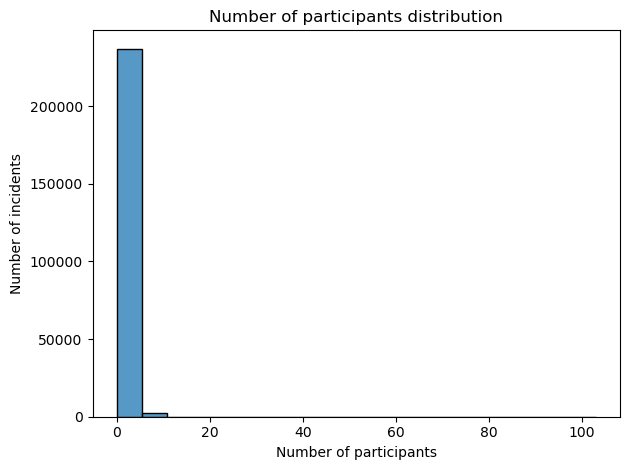

In [3540]:
sns.histplot(incidents_df['n_participants'], bins=round(np.log2(len(incidents_df['n_participants'])) + 1))
plt.title('Number of participants distribution')
plt.xlabel('Number of participants')
plt.ylabel('Number of incidents')
plt.tight_layout()
plt.show()

Plottando la distribuzione dei partecipanti è evidente che il numero di partecipanti si concentra tra 0 e 5 partecipanti 

In [3541]:
n_participants_test_df = (incidents_df['n_participants'] == incidents_df['n_males'] + incidents_df['n_females']) & (incidents_df['n_participants'] == incidents_df['n_participants_child'] + incidents_df['n_participants_teen'] + incidents_df['n_participants_adult'])  
print(n_participants_test_df.value_counts())
incidents_df[~n_participants_test_df][['n_participants', 'n_males', 'n_females', 'n_participants_child', 'n_participants_teen', 'n_participants_adult']]

True     167742
False     71935
dtype: int64


,n_participants,n_males,n_females,n_participants_child,n_participants_teen,n_participants_adult
2,2.0,NaN,NaN,NaN,NaN,NaN
3,2.0,1.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,0.0,0.0,1.0
20,2.0,1.0,0.0,0.0,0.0,2.0
25,2.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
239661,0.0,NaN,NaN,NaN,NaN,NaN
239663,2.0,2.0,0.0,0.0,1.0,0.0
239666,0.0,NaN,NaN,NaN,NaN,NaN
239673,3.0,2.0,0.0,0.0,0.0,2.0


Facendo un controllo se il numero di partecipanti è coerente con la somma per gender e per age group (child, teen, adult), emerge che ci sono 71935 record che non rispettano tale condizione per due motivi:
1. l'uguaglianza risulta falsa poiché i termini numerici non coincidono tra di loro
2. l'uguaglianza risulta falsa a causa di valori nulli. In questo caso, se il numero di partecipanti è 0 e i valori raggrupati per gender ed age group è nullo, pensiamo di procedere sostituendo i valori nulli con 0.

### N killed

In [3542]:
incidents_df['n_killed'].isnull().sum()

0

In [3543]:
incidents_df['n_killed'].info()
incidents_df['n_killed'].value_counts()


<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_killed
Non-Null Count   Dtype
--------------   -----
239677 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
8          5
9          3
7          2
16         1
10         1
11         1
17         1
27         1
50         1
Name: n_killed, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3544]:
incidents_df['n_killed'].describe()

count    239677.000000
mean          0.252290
std           0.521779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: n_killed, dtype: float64

### N injured

In [3545]:
incidents_df['n_injured'].isnull().sum()

0

In [3546]:
incidents_df['n_injured'].info()
incidents_df['n_injured'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_injured
Non-Null Count   Dtype
--------------   -----
239677 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
12         5
11         4
19         3
14         3
16         2
15         2
13         2
17         2
18         1
20         1
25         1
53         1
Name: n_injured, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3547]:
incidents_df['n_injured'].describe()

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

### N arrested

In [3548]:
incidents_df['n_arrested'].isnull().sum()

27626

In [3549]:
incidents_df['n_arrested'].info()
incidents_df['n_arrested'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_arrested
Non-Null Count   Dtype  
--------------   -----  
212051 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


0.0     138602
1.0      57440
2.0      10372
3.0       3482
4.0       1378
5.0        432
6.0        144
7.0         62
8.0         41
9.0         23
10.0        18
13.0        10
12.0         7
11.0         7
15.0         7
19.0         5
16.0         3
17.0         2
35.0         2
29.0         2
24.0         2
20.0         1
21.0         1
18.0         1
31.0         1
27.0         1
30.0         1
23.0         1
22.0         1
63.0         1
14.0         1
Name: n_arrested, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3550]:
incidents_df['n_arrested'].describe()

count    212051.000000
mean          0.468439
std           0.851035
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          63.000000
Name: n_arrested, dtype: float64

### N unharmed

In [3551]:
incidents_df['n_unharmed'].isnull().sum()

27626

In [3552]:
incidents_df['n_unharmed'].info()
incidents_df['n_unharmed'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 239677 entries, 0 to 239676
Series name: n_unharmed
Non-Null Count   Dtype  
--------------   -----  
212051 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


0.0     146382
1.0      41558
2.0      14948
3.0       5619
4.0       2226
5.0        800
6.0        295
7.0        109
8.0         59
9.0         28
10.0        14
12.0         4
15.0         3
11.0         3
20.0         1
17.0         1
14.0         1
Name: n_unharmed, dtype: int64

Da quanto possiamo osservare da una prima analisi, questa colonna non presenta valori diversi da quelli numerici né evidenti outlier

In [3553]:
incidents_df['n_unharmed'].describe()

count    212051.000000
mean          0.494169
std           0.925566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: n_unharmed, dtype: float64

### Notes

In [3554]:
incidents_df['notes'].isnull().sum() 

81017

### Incident characteristics1

In [3555]:
incidents_df['incident_characteristics1'].isnull().sum()

326

In [3556]:
#incidents_df['incident_characteristics1'].str.contains('shot', case=False) & incidents_df['incident_characteristics1'].notna()]
incidents_df['incident_characteristics1'].value_counts()

Shot - Wounded/Injured                                                                                  93926
Shot - Dead (murder, accidental, suicide)                                                               45054
Non-Shooting Incident                                                                                   41541
Shots Fired - No Injuries                                                                               33949
Armed robbery with injury/death and/or evidence of DGU found                                             7528
Institution/Group/Business                                                                               4316
TSA Action                                                                                               2653
Brandishing/flourishing/open carry/lost/found                                                            1350
Home Invasion                                                                                            1323
Possession

### Incident characteristics2

In [3557]:
incidents_df['incident_characteristics2'].isnull().sum() 

97746

In [3558]:
incidents_df['incident_characteristics2'].value_counts()

Officer Involved Incident                                                  13881
Drive-by (car to street, car to car)                                       11873
Drug involvement                                                           11717
Home Invasion                                                               8664
Shot - Dead (murder, accidental, suicide)                                   8345
                                                                           ...  
Cleaning gun                                                                   1
Child with gun - no shots fired                                                1
Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator        1
Officer Involved Shooting - Officer killed                                     1
Hunting accident                                                               1
Name: incident_characteristics2, Length: 90, dtype: int64

## Column Analysis (povertyByStateYear.csv)

### state

In [3559]:
print(f"number of states in the df: {len(poverty_df['state'].unique())}")
poverty_df['state'].unique()

number of states in the df: 52


array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

C'è anche la media degli stati uniti in generale, potrebbe essere usata per inferire i valori mancanti di povertyPercentage, ma prima verificare quali anni ci servono, dopo aver individuato il time interval (o meglio year interval utile, che dovrebbe essere 2013-2018, rifare questa analisi)

Ulteriore controllo possibile: la categoria United States dovrebbe rappresentare la soglia media di povertà nell'intera nazione, si può calcolare la media e compararla con il valore di "United States" e vedere se sono giusti i valori

### year

In [3560]:
if(len(state_list) != 52): #before in this variables, there were not considered neither district of columbia nor united states
    state_list.append("District of Columbia")
    state_list.append("United States")
correct_years = [year for year in poverty_df['year'].unique() if year not in [2009, 2010]]
for y in sorted(poverty_df['year'].unique()):
    print(f"for year {y} all the states are present: {sorted(list(poverty_df[poverty_df['year'] == y]['state'])) == sorted(state_list)}")

for year 2004 all the states are present: True
for year 2005 all the states are present: True
for year 2006 all the states are present: True
for year 2007 all the states are present: True
for year 2008 all the states are present: True
for year 2009 all the states are present: False
for year 2010 all the states are present: False
for year 2011 all the states are present: True
for year 2012 all the states are present: True
for year 2013 all the states are present: True
for year 2014 all the states are present: True
for year 2015 all the states are present: True
for year 2016 all the states are present: True
for year 2017 all the states are present: True
for year 2018 all the states are present: True
for year 2019 all the states are present: True
for year 2020 all the states are present: True


In [3561]:
print(f"number of states per {poverty_df['year'].value_counts().sort_index()}")

number of states per 2004    52
2005    52
2006    52
2007    52
2008    52
2009    53
2010    51
2011    52
2012    52
2013    52
2014    52
2015    52
2016    52
2017    52
2018    52
2019    52
2020    52
Name: year, dtype: int64


2009 e 2010 hanno rispettivamente un valore in più e uno in meno rispetto agli altri che hanno 51 stati + 1 media nazionale

In [3562]:
print(f"Additional string/states in 2009: {len(set(poverty_df[poverty_df['year'] == 2009]['state']) - set(state_list))}")
print(f"States missing in 2010: {set(state_list) - set(poverty_df[poverty_df['year'] == 2010]['state'])}")

Additional string/states in 2009: 0
States missing in 2010: {'Wyoming'}


In [3563]:
poverty_df[(poverty_df['year'] == 2009) & (poverty_df['state'] =='Wyoming')]

,state,year,povertyPercentage
571,Wyoming,2009,10.0
623,Wyoming,2009,9.8


Quindi il problema di 2009 non è quello di avere stati in più, ma un indice di povertà ripetuto due volte nello stesso anno, mentre per il 2010 manca il Wyoming come stato 

### povertyPercentage

In [3564]:
poverty_df['povertyPercentage'].isnull().sum()

52

In [3565]:
poverty_df[poverty_df['povertyPercentage'].isnull()]

,state,year,povertyPercentage
416,United States,2012,NaN
417,Alabama,2012,NaN
418,Alaska,2012,NaN
419,Arizona,2012,NaN
420,Arkansas,2012,NaN
421,California,2012,NaN
422,Colorado,2012,NaN
423,Connecticut,2012,NaN
424,Delaware,2012,NaN
425,District of Columbia,2012,NaN


Osservazione: tutti i valori nulli per povertyPercentage appartengono all'anno 2012 per cui non si è ricevuta alcuna registrazione di valore di povertà, pertanto l'anno 2012 non ha valore alcun informativo

In [3566]:
# for the DP, poverty_df.dropna(subset=['povertyPercentage'], inplace=True)

Tuttavia poiché il nostro intento è integrare questo dataset con incidents.csv il quale ha date riferite unicamente al periodo 2013-2018, la nostra l'analisi si concentrerà su quel periodo di tempo

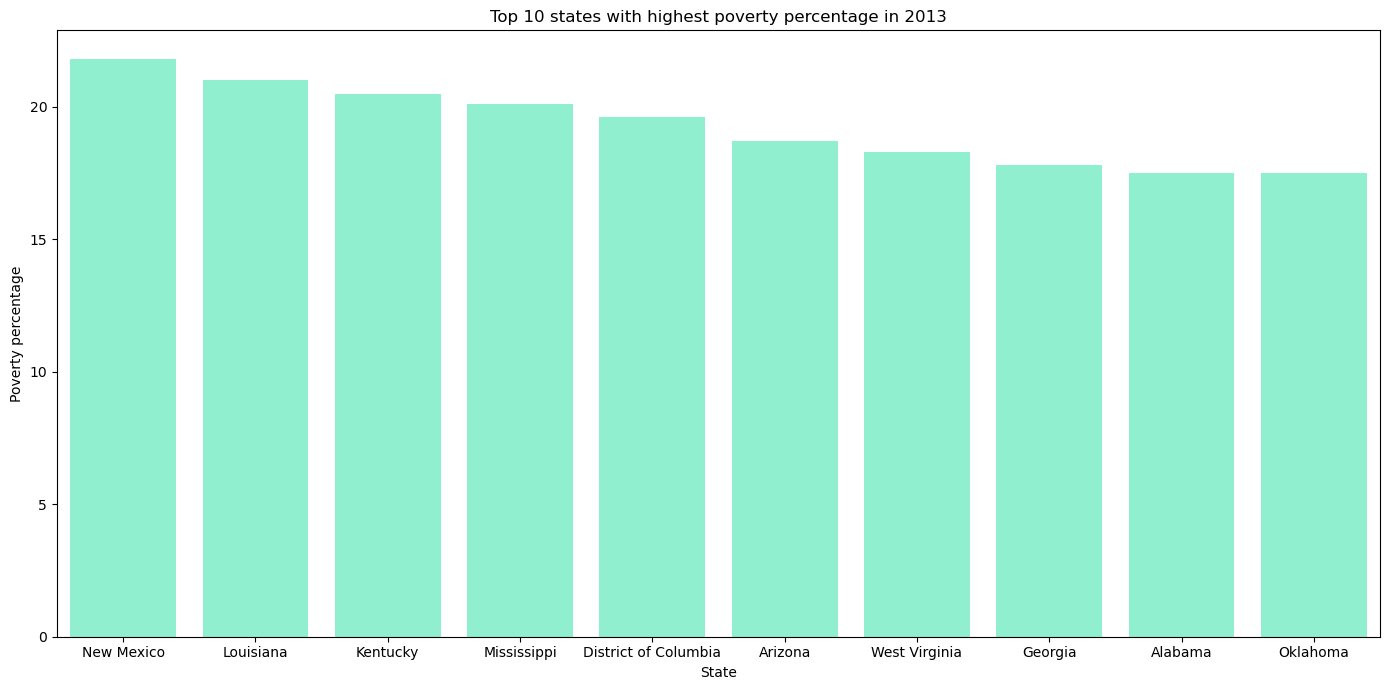

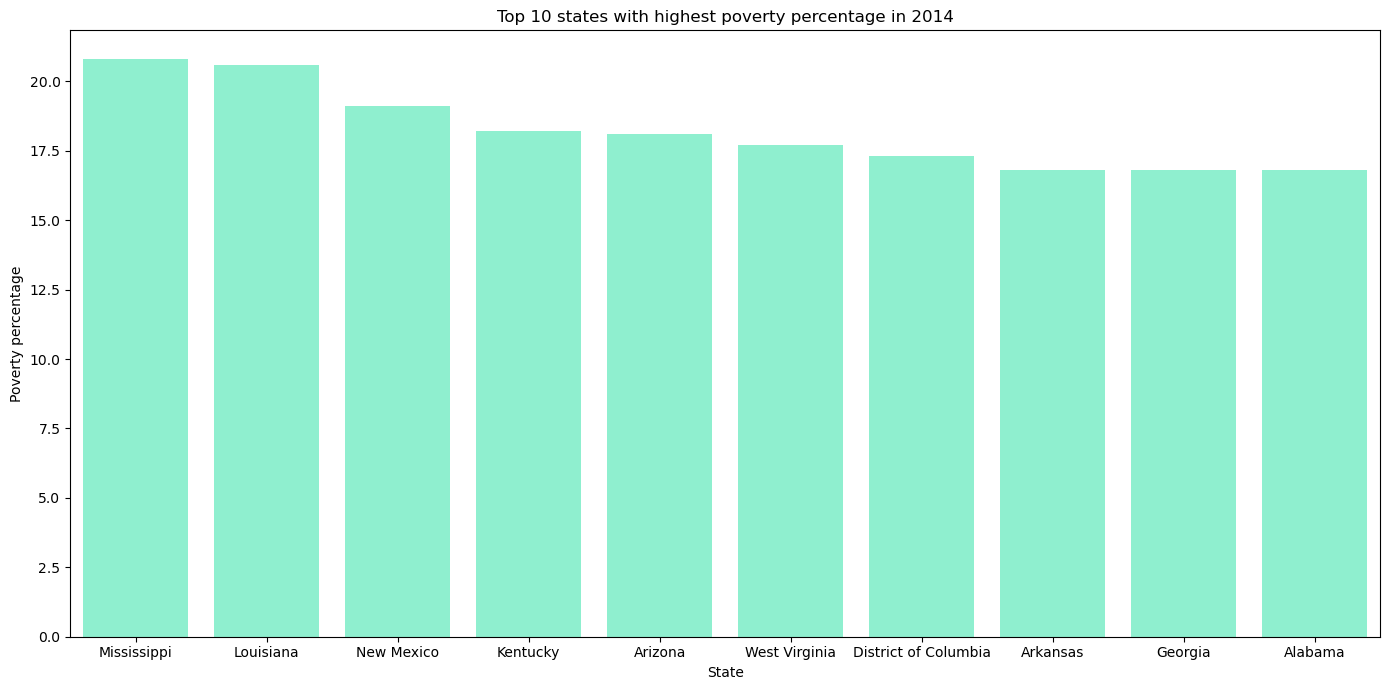

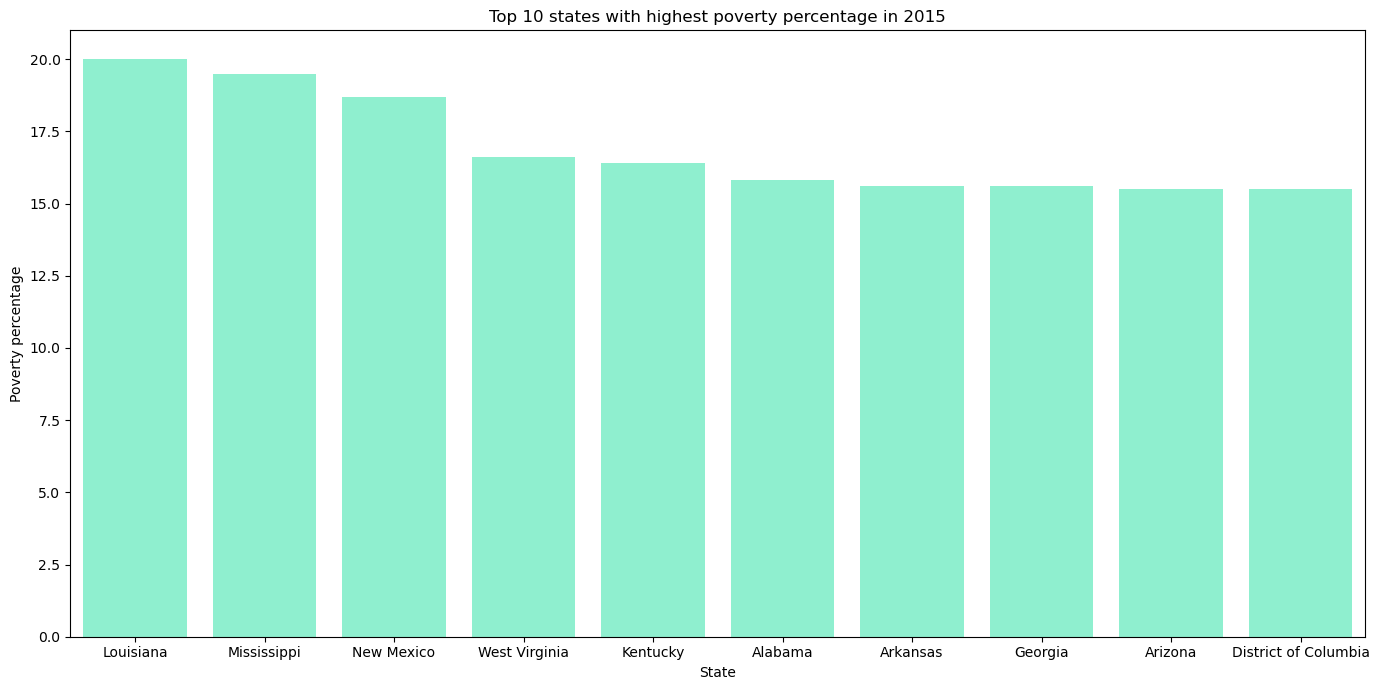

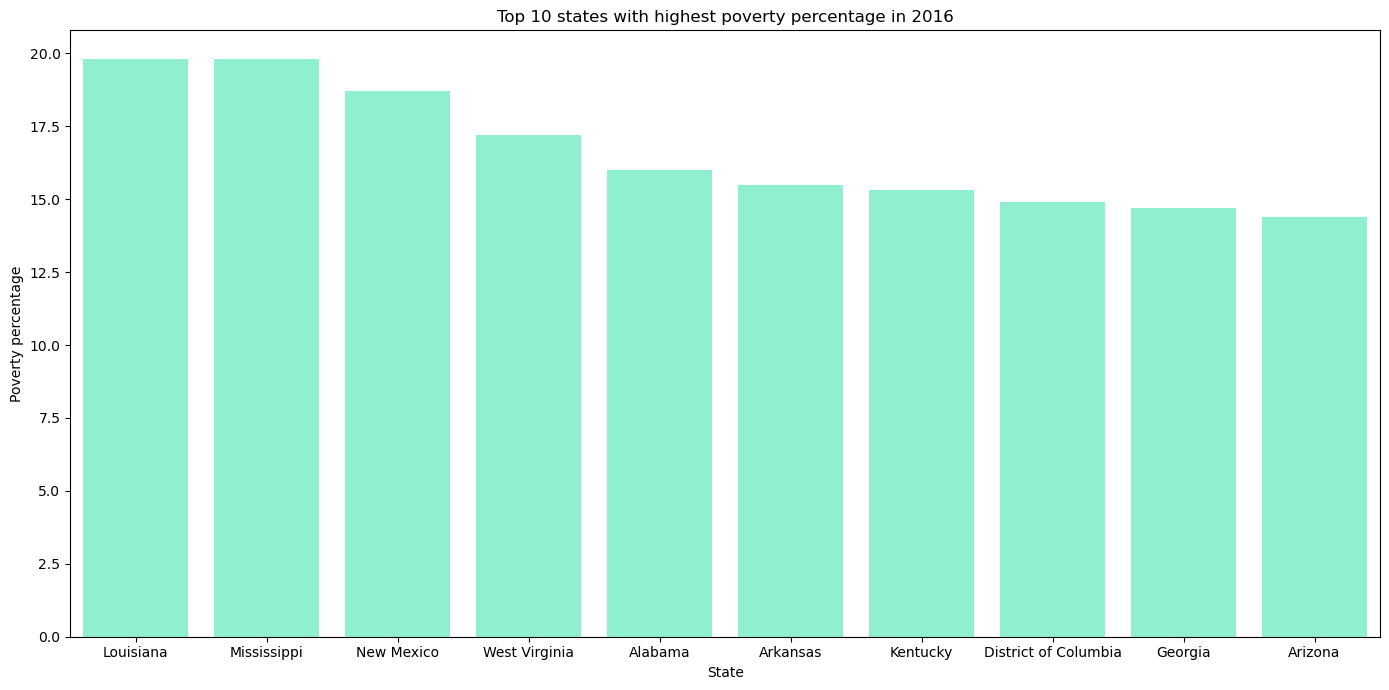

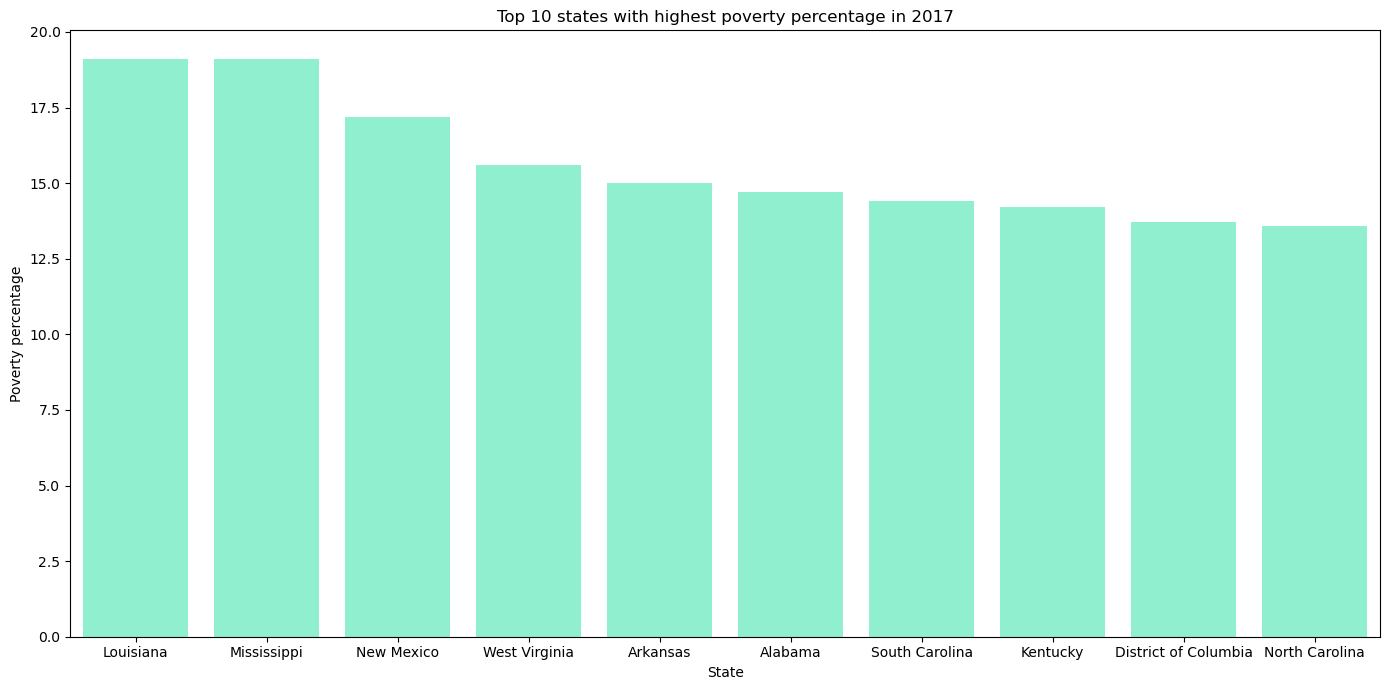

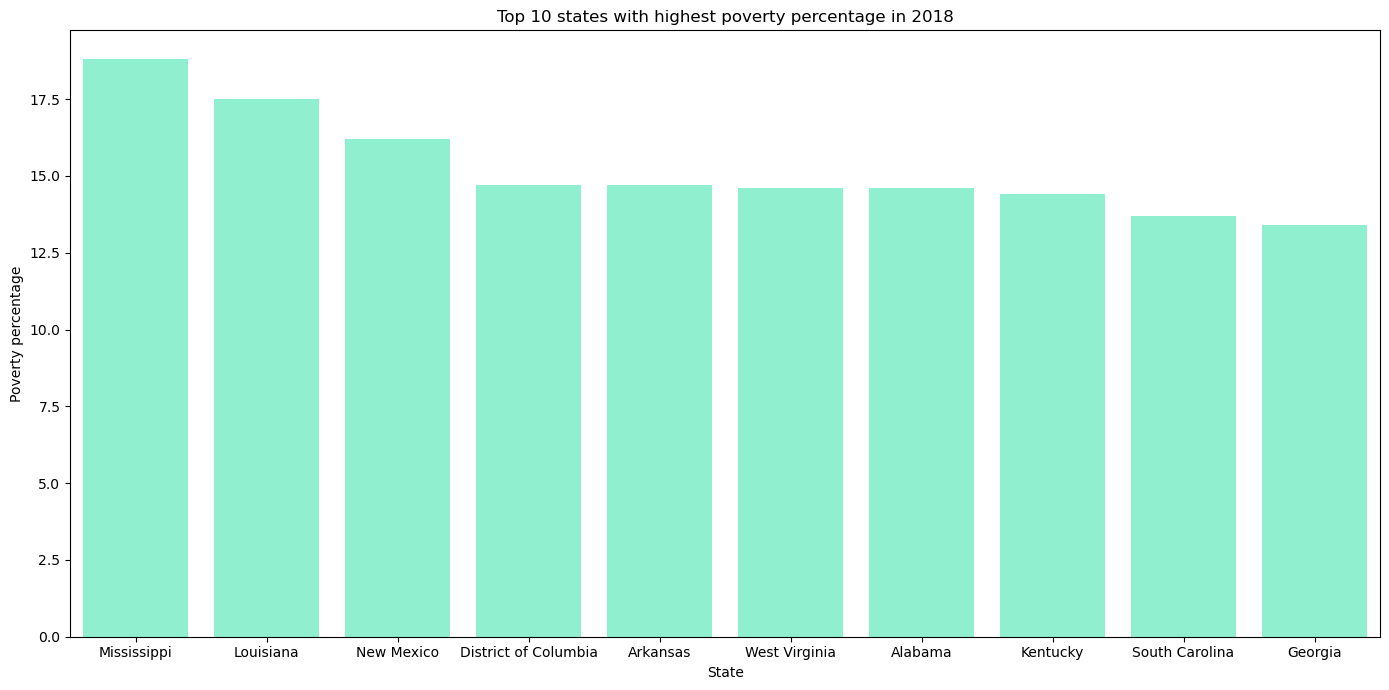

In [3567]:
year_list = [i for i in range(2013,2019)]
for i in year_list:   
    poverty_by_year_df = poverty_df[poverty_df['year'] == i].sort_values('povertyPercentage', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x=poverty_by_year_df['state'].head(10), y=poverty_by_year_df['povertyPercentage'].head(10), color='aquamarine')
    plt.title(f'Top 10 states with highest poverty percentage in {i}')
    plt.xlabel('State')
    plt.ylabel('Poverty percentage')
    plt.tight_layout()
    plt.show()

## Column Analysis (year_state_district_house.csv)

In [3568]:
year_state_df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


### state

In [3569]:
print(len(year_state_df['state'].unique()))
print(year_state_df['state'].unique())

51
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'
 'DISTRICT OF COLUMBIA']


Gli stati in incidents.csv con il quale è prevista la data integration sono in lowercase, quindi nell'integration, gli stati verranno inseriti in lowercase

### year


In [3570]:
year_state_df['year'].unique()

array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018,
       2020, 2022])

anni da 1976 a 2022, poiché abbiamo previsto data integration con dataset incidents.csv il quale range di anni è tra 2013 e 2018, ci concentreremo anche in questo caso in quell'intervallo di tempo

### congressional_district

In [3571]:
for y in [i for i in range(2014,2019,2)]:
    
    print(f"year: {y}, total district: {len(year_state_df[year_state_df['year'] == y]['congressional_district'])}")
    grouped = year_state_df[year_state_df['year'] == y].groupby('state')
    for state, groups in grouped:
        print(f"{state}: {len(groups['congressional_district'])}", end=" | ")
    print("")

year: 2014, total district: 435
ALABAMA: 7 | ALASKA: 1 | ARIZONA: 9 | ARKANSAS: 4 | CALIFORNIA: 53 | COLORADO: 7 | CONNECTICUT: 5 | DELAWARE: 1 | FLORIDA: 27 | GEORGIA: 14 | HAWAII: 2 | IDAHO: 2 | ILLINOIS: 18 | INDIANA: 9 | IOWA: 4 | KANSAS: 4 | KENTUCKY: 6 | LOUISIANA: 6 | MAINE: 2 | MARYLAND: 8 | MASSACHUSETTS: 9 | MICHIGAN: 14 | MINNESOTA: 8 | MISSISSIPPI: 4 | MISSOURI: 8 | MONTANA: 1 | NEBRASKA: 3 | NEVADA: 4 | NEW HAMPSHIRE: 2 | NEW JERSEY: 12 | NEW MEXICO: 3 | NEW YORK: 27 | NORTH CAROLINA: 13 | NORTH DAKOTA: 1 | OHIO: 16 | OKLAHOMA: 5 | OREGON: 5 | PENNSYLVANIA: 18 | RHODE ISLAND: 2 | SOUTH CAROLINA: 7 | SOUTH DAKOTA: 1 | TENNESSEE: 9 | TEXAS: 36 | UTAH: 4 | VERMONT: 1 | VIRGINIA: 11 | WASHINGTON: 10 | WEST VIRGINIA: 3 | WISCONSIN: 8 | WYOMING: 1 | 
year: 2016, total district: 435
ALABAMA: 7 | ALASKA: 1 | ARIZONA: 9 | ARKANSAS: 4 | CALIFORNIA: 53 | COLORADO: 7 | CONNECTICUT: 5 | DELAWARE: 1 | FLORIDA: 27 | GEORGIA: 14 | HAWAII: 2 | IDAHO: 2 | ILLINOIS: 18 | INDIANA: 9 | IOWA: 4

I congressi distrettuali come confermato da [Wikipedia] son 435 e vengono ridisegnati ogni 10 anni, siccome ci interessa il range 2013-2018, osserviamo infatti che i congressi distrettuali rimangono gli stessi

### party


TODO: plottare su mappa i distretti colorati per republican o democrat o democratic-farmer-labor?

In [3572]:
for y in [i for i in range(2014,2019,2)]:
    
    print(f"year: {y}, total district: {len(year_state_df[year_state_df['year'] == y]['congressional_district'])}")
    grouped = year_state_df[year_state_df['year'] == y].groupby('state')
    for state, groups in grouped:
        print(f"{state}:\n{groups['party']}")
    print("")

year: 2014, total district: 435
ALABAMA:
8265    REPUBLICAN
8266    REPUBLICAN
8267    REPUBLICAN
8268    REPUBLICAN
8269    REPUBLICAN
8270    REPUBLICAN
8271      DEMOCRAT
Name: party, dtype: object
ALASKA:
8272    REPUBLICAN
Name: party, dtype: object
ARIZONA:
8273      DEMOCRAT
8274    REPUBLICAN
8275      DEMOCRAT
8276    REPUBLICAN
8277    REPUBLICAN
8278    REPUBLICAN
8279      DEMOCRAT
8280    REPUBLICAN
8281      DEMOCRAT
Name: party, dtype: object
ARKANSAS:
8282    REPUBLICAN
8283    REPUBLICAN
8284    REPUBLICAN
8285    REPUBLICAN
Name: party, dtype: object
CALIFORNIA:
8286    REPUBLICAN
8287      DEMOCRAT
8288      DEMOCRAT
8289    REPUBLICAN
8290      DEMOCRAT
8291      DEMOCRAT
8292      DEMOCRAT
8293    REPUBLICAN
8294      DEMOCRAT
8295    REPUBLICAN
8296      DEMOCRAT
8297      DEMOCRAT
8298      DEMOCRAT
8299      DEMOCRAT
8300      DEMOCRAT
8301      DEMOCRAT
8302      DEMOCRAT
8303      DEMOCRAT
8304      DEMOCRAT
8305      DEMOCRAT
8306    REPUBLICAN
8307    REPUBL

### candidatevotes


questi sono i voti del partito di maggioranza

In [3573]:
year_state_df[['state', 'congressional_district', 'candidatevotes']]

,state,congressional_district,candidatevotes
0,ALABAMA,1,98257
1,ALABAMA,2,90069
2,ALABAMA,3,106935
3,ALABAMA,4,141490
4,ALABAMA,5,113553
...,...,...,...
10436,WISCONSIN,5,243741
10437,WISCONSIN,6,239231
10438,WISCONSIN,7,209224
10439,WISCONSIN,8,223981


### totalvotes

questi sono i voti totali, per me basta sapere il partito di maggioranza, la percentuale di voti non capisco a cosa possa servire

## Data Integration 

In [3574]:
#preliminary operations for data integration:
# transform date in datetime objects and retrieves the years
# we create a dummy incidents_df_sort to not modify directly incidents_df, to delete after!
##incidents_df_sort = incidents_df.sort_values("date")
##incidents_df_sort['date'] = pd.to_datetime(incidents_df_sort['date'])

#incidents_df_sort['date'].dt.year.value_counts() #we should drop "2028":195, "2029":14107, "2030":8729, total: 23.031
##incidents_df_sort['year'] = incidents_df_sort['date'].dt.year

##print(incidents_df_sort.year.value_counts())

In [3575]:
#join incident - poverty

#for sake of simplicity, we drop date 
#incidents_df_sort = incidents_df_sort.drop(columns="date")
#print(incidents_df_sort.columns)

# deleting records with year 2028, 2029, 2030
##for i in [2028,2029,2030]:
##    incidents_df_sort = incidents_df_sort.drop(incidents_df_sort[incidents_df_sort['year'] == i].index)
#print(incidents_df_sort["year"].value_counts())


# to keep the generic poverty percentage in u.s. : poverty_US = poverty_df[poverty_df['state'] == "United States"] 
#print("before") #print("United States" in poverty_df["state"].unique())

#deleting records from poverty with state = "United States", it's the avg in the whole u.s.
##poverty_df = poverty_df.drop(poverty_df[poverty_df['state'] == "United States"].index)

#print("after") #print("United States" in poverty_df["state"].unique())

#print(poverty_df['state'].value_counts())

# years in poverty: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
#print(poverty_df.sort_values("year")['year'].unique())
#simplest case: drop from 2004 to 2012 and from 2019 to 2020

##for i in [2004,2005,2006,2007,2008,2009,2010,2011,2012,2019,2020]:
##    poverty_df = poverty_df.drop(poverty_df[poverty_df['year'] == i].index)
##print(poverty_df["year"].value_counts())

##print(f"{incidents_df_sort.shape} incident shape")
##print(f"{poverty_df.shape} poverty shape (before)")

##incident_poverty_df = pd.merge(incidents_df_sort, poverty_df, on=["state", "year"])

##print(f"{incident_poverty_df.shape} incident+poverty shape (after)")



In [3576]:
#TODO len are not the same, to fix the problem. 

##incident_poverty_df_st_p = incident_poverty_df.loc[:, ['state', 'povertyPercentage']]
##print(len(incident_poverty_df_st_p['povertyPercentage'].unique()))

##poverty_df_st_p = poverty_df.loc[:, ['state', 'povertyPercentage']]
##print(len(poverty_df_st_p['povertyPercentage'].unique()))

In [3577]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       239677 non-null  datetime64[ns]
 1   state                      239677 non-null  object        
 2   city_or_county             239677 non-null  object        
 3   address                    223180 non-null  object        
 4   latitude                   231754 non-null  float64       
 5   longitude                  231754 non-null  float64       
 6   congressional_district     227733 non-null  float64       
 7   state_house_district       200905 non-null  float64       
 8   state_senate_district      207342 non-null  float64       
 9   participant_age1           147379 non-null  float64       
 10  participant_age_group1     197558 non-null  object        
 11  participant_gender1        203315 non-null  object  

In [3578]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [3579]:
year_state_df.info()
year_state_df.year.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018,
       2020, 2022])

In [3581]:


# creating a column with the year of the incident
incidents_df['year'] = pd.DatetimeIndex(incidents_df['date']).year 
incidents_df_joined = incidents_df.copy()
incidents_df_joined = pd.merge(incidents_df_joined, poverty_df, on=["state", "year"])

# joining the incidents with the year_state_df, on the state and the year and the congretional district (lower case)
#lower case the state column 
incidents_df_joined['state'] = incidents_df_joined['state'].str.lower()
year_state_df['state'] = year_state_df['state'].str.lower()

#adding one year to the year_state_df year column
year_state_df_copy = year_state_df.copy()
year_state_df_copy['year'] = year_state_df_copy['year'] + 1

#concat the two dataframes year_state_df and year_state_df_copy
year_state_df = pd.concat([year_state_df, year_state_df_copy])
print(len(year_state_df))


incidents_df_joined = pd.merge(incidents_df_joined, year_state_df, on=["state", "year", "congressional_district"])
incidents_df_joined["year"].unique()

41764


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,povertyPercentage,party,candidatevotes,totalvotes
396092,2013-04-21,washington,Federal Way,33300 block of 18th Lane South,47.3030,-122.3100,9.0,30.0,30.0,62.0,...,0.0,5.0,NaN,"Shot - Dead (murder, accidental, suicide)",Home Invasion,2013,11.9,DEMOCRAT,192034,268139
396093,2013-04-21,washington,Federal Way,33300 block of 18th Lane South,47.3030,-122.3100,9.0,30.0,30.0,62.0,...,0.0,5.0,NaN,"Shot - Dead (murder, accidental, suicide)",Home Invasion,2013,11.9,DEMOCRAT,192034,268139
396094,2013-03-31,washington,Auburn,2802 Auburn Way North,47.3149,-122.2240,8.0,47.0,47.0,23.0,...,0.0,5.0,"""Five shooters in all"" involved in incident, but it seems that only one person has been charged for those victims",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)",2013,11.9,REPUBLICAN,180204,302090
396095,2013-03-31,washington,Auburn,2802 Auburn Way North,47.3149,-122.2240,8.0,47.0,47.0,23.0,...,0.0,5.0,"""Five shooters in all"" involved in incident, but it seems that only one person has been charged for those victims",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)",2013,11.9,REPUBLICAN,180204,302090
396096,2018-03-18,hawaii,Honolulu,555 N King St,21.3186,-157.8650,1.0,29.0,13.0,35.0,...,0.0,1.0,"Suspect pointed realistic airsoft gun at officers during robbery, shot at by officers",Shots Fired - No Injuries,Officer Involved Incident,2018,9.5,DEMOCRAT,134650,184211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396187,2013-10-02,nebraska,Omaha,North 42nd and Browne streets,41.3050,-95.9758,2.0,NaN,11.0,19.0,...,0.0,4.0,NaN,Shot - Wounded/Injured,"Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)",2013,10.9,REPUBLICAN,133964,263731
396188,2013-11-25,minnesota,Minneapolis,1611 E Lake St,44.9481,-93.2505,5.0,NaN,62.0,32.0,...,0.0,4.0,NaN,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)",2013,9.0,DEMOCRAT,262102,351969
396189,2013-11-25,minnesota,Minneapolis,1611 E Lake St,44.9481,-93.2505,5.0,NaN,62.0,32.0,...,0.0,4.0,NaN,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)",2013,9.0,DEMOCRAT,262102,351969
396190,2013-08-25,minnesota,Minneapolis,2600 block of Cedar and 2600 block of 18th Avenue South,44.9553,-93.2489,5.0,NaN,62.0,18.0,...,0.0,5.0,Perpetrator was acquitted of this crime due to lack of evidence in June 2015 after a week's deliberation.,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)",2013,9.0,DEMOCRAT,262102,351969


Nel join con poverty_df vengono cancellati gli anni dal 2022-2030

## Distribution analysis

nota: stampare la distribuzione degli incidenti in base ai luoghi geografici e.g. in base allo stato, congressional district, città

## Correlation analysis

Verificare se gender è correlato con gli age group maggiormente rispetto al n_participants perché in quel caso sarebbe necessario fixare gli n_participants, altrimenti il contrario

vedere se n_killed, n_injured, n_arrested, n_unharmed hanno correlazioni vicine allo zero, perché in quel caso sono indipendenti tra di loro